In [48]:
# 引入库

from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.inference import BeliefPropagation
from pgmpy.inference import VariableElimination
import pandas as pd
import numpy as np
from typing import *
import scienceplots # 如果不存在，需要pip install scienceplots
plt.style.available # 查看可用的样式    
plt.style.use(['science','ieee']) # 选择一个样式

In [33]:
# 创建数据 # 6个样本，4个特征： 6*4矩阵

data = {
    'Packet11': [0, 0.1, 2, 4,True,False],
    'Packet12': [0, -1.1, 5, 0,True,True],
    'Packet13': [0, 1, 2, 4,5,False],
    'Packet14': [0, 1, True, False,5,5]
}

X = np.random.rand(10)
Y = np.random.rand(10)

Z = X + Y
data2 = {
    'X': X,
    'Y': Y,
    'Z': Z,
}
data = pd.DataFrame(data)
print(data)

  Packet11 Packet12 Packet13 Packet14
0        0        0        0        0
1      0.1     -1.1        1        1
2        2        5        2     True
3        4        0        4    False
4     True     True        5        5
5    False     True    False        5


In [34]:
# 向data中添加一行数据
data.loc[6] = [0, 1, 2, 4]

In [35]:
# data的大小
print(data.shape)

(7, 4)


In [36]:

# 建立Graph # 
# 考虑到数据包的前后因果性和空间上的相关性
def construct_base_edges(n, m) -> List[tuple]:
    # n*m ， n flows， each flow has m packets
    edges = []
    for i in range(1,n+1):
        for j in range(1,m+1):
            if i == 1 and j == 1:
                continue
            elif i == 1 and j!= 1:
                edges.append((f"Packet{i}{j-1}", f"Packet{i}{j}"))
            elif j == 1 and i!=1:
                edges.append((f"Packet{i-1}{j}", f"Packet{i}{j}"))
            else:
                edges.append((f"Packet{i-1}{j}", f"Packet{i}{j}"))
                edges.append((f"Packet{i}{j-1}", f"Packet{i}{j}"))
        
    
    return edges

In [37]:
###### MLE参数学习 #########
# 使用 MaximumLikelihoodEstimator 进行参数学习
from pgmpy.estimators import HillClimbSearch, K2Score, MaximumLikelihoodEstimator

base_edges = construct_base_edges(1,4) # 1 flow, 4 packets
print(base_edges)
model = BayesianModel(base_edges) # input: 边集合  output: model
model.fit(data, estimator=MaximumLikelihoodEstimator) # 最大似然学习参数


[('Packet11', 'Packet12'), ('Packet12', 'Packet13'), ('Packet13', 'Packet14')]


/data/users/gaoli/.conda/envs/pytorch111/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [38]:
###### 信念传播推断 #########

# 使用 BeliefPropagation 进行推断
inference_bp = BeliefPropagation(model)
query_bp = inference_bp.map_query(variables=['Packet14'], evidence={'Packet11': 1,'Packet12': 5})
print("信念传播算法的推断结果：", query_bp)

# 推断它的后验概率
# 创建 VariableElimination 推断对象
inference = VariableElimination(model)

# 定义一些证据（evidence），例如 A=0, B=1
evidence = {'Packet11': 0, 'Packet12': 1}

# 进行推断，计算后验概率
posterior = inference.query(variables=['Packet13'], evidence=evidence,joint=True)
# 得到当Packet13=4的概率
print(type(posterior))
print(posterior)
print(posterior.values[4])




信念传播算法的推断结果： {'Packet14': 1}
<class 'pgmpy.factors.discrete.DiscreteFactor.DiscreteFactor'>
+-------------+-----------------+
| Packet13    |   phi(Packet13) |
+=============+=================+
| Packet13(0) |          0.3333 |
+-------------+-----------------+
| Packet13(1) |          0.0000 |
+-------------+-----------------+
| Packet13(2) |          0.3333 |
+-------------+-----------------+
| Packet13(4) |          0.0000 |
+-------------+-----------------+
| Packet13(5) |          0.3333 |
+-------------+-----------------+
0.3333333333333333


/data/users/gaoli/.conda/envs/pytorch111/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [39]:
model.check_model()

True

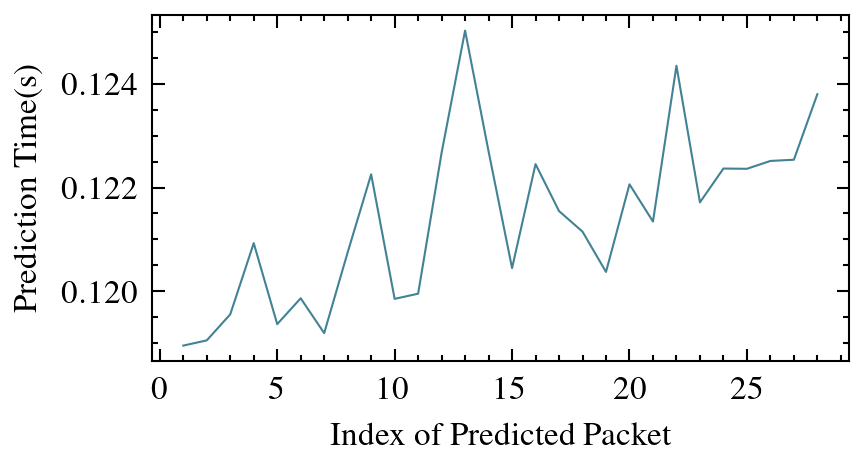

<Figure size 1980x1500 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots # 如果不存在，需要pip install scienceplots
plt.style.available # 查看可用的样式    
plt.style.use(['science','ieee']) # 选择一个样式

plt.figure(figsize=(3, 1.5),dpi=300) # 设置画布大小
data = [0.11895513534545898, 0.11905550956726074, 0.11955714225769043, 0.12092900276184082, 0.1193685531616211, 0.11986660957336426, 0.11919522285461426, 0.12075114250183105, 0.1222543716430664, 0.11985540390014648, 0.11995506286621094, 0.12267088890075684, 0.12502384185791016, 0.1226959228515625, 0.12044763565063477, 0.1224513053894043, 0.12154674530029297, 0.12115049362182617, 0.12037444114685059, 0.12206244468688965, 0.12134528160095215, 0.12434577941894531, 0.12171530723571777, 0.12236618995666504, 0.1223611831665039, 0.1225125789642334, 0.12253594398498535, 0.12379908561706543]# 输入数据
x =list(range(1,len(data)+1)) # x轴数据
# 绘图
# 设置颜色为淡蓝色

plt.plot(x, data, '-',  linewidth=0.5,color='#428295')  # 注意这里的'-',lw的设置
plt.xlabel("Index of Predicted Packet")  # x轴标签
plt.ylabel("Prediction Time(s)")  # y轴标签
# 设置字体大小

# set x_ticks
# plt.xticks(x, [i for i in range(1,len(data)+1)])
# plt.title("Prediction Time of Belief Propagation on Each Packets")  # 图标题
plt.show()  # 显示图形
plt.savefig("/data/users/gaoli/exp_Robust/figures/infertime.png", dpi=300) # 保存图片

In [133]:
sum(data)/len(data)

0.12139815092086792

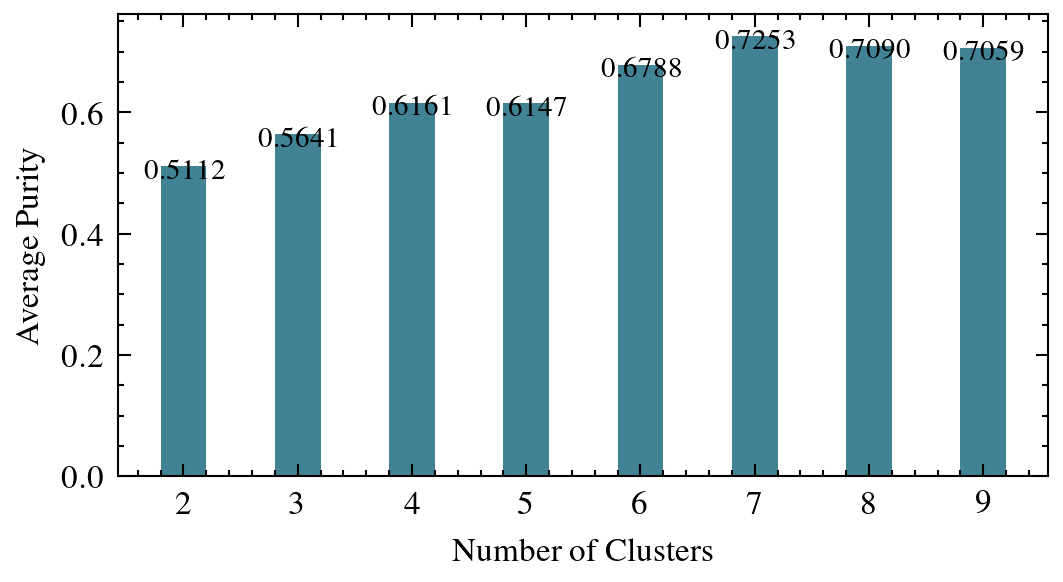

<Figure size 1980x1500 with 0 Axes>

In [79]:
import matplotlib.pyplot as plt
import numpy as np
 
import scienceplots # 如果不存在，需要pip install scienceplots
plt.style.available # 查看可用的样式    
plt.style.use(['science','ieee']) # 选择一个样式
plt.figure(figsize=(4,2),dpi=300)
data = [0.511224, 0.564058,0.6161225,0.614665,0.678836,0.725348,0.708957,0.705932] # 输入数据
x =list(range(1,len(data)+1)) # x轴数据
# 绘图
# 设置颜色为淡蓝色
# 绘制柱状图
plt.bar(x, data, width=0.4, color='#428295', label='Purity')
for i, value in enumerate(data):
    plt.text(i+1, value-0.03 , '{:.4f}'.format(value), ha='center', va='bottom', fontsize=7, color='black')
# plt.plot(x, data, '-',  linewidth=0.5)  # 注意这里的'-',lw的设置
plt.xlabel("Number of Clusters")  # x轴标签
plt.ylabel("Average Purity")  # y轴标签
# set x_ticks
plt.xticks(x, [i+1 for i in range(1,len(data)+1)])
# plt.title("Prediction Time of Belief Propagation on Each Packets")  # 图标题
plt.show()  # 显示图形
plt.savefig("/data/users/gaoli/exp_Robust/figures/Nclusters_bar.png", dpi=300) # 保存图片

In [55]:
hist_data = [0.7058823529411765, 0.9473684210526315, 0.8947368421052632, 0.631578947368421, 0.5789473684210527, 0.7894736842105263, 0.7894736842105263, 0.7894736842105263, 0.7894736842105263, 0.7894736842105263, 0.7368421052631579, 0.6111111111111112, 0.7368421052631579, 0.7368421052631579, 0.631578947368421, 0.7368421052631579, 0.7368421052631579, 0.631578947368421, 0.7894736842105263, 0.5789473684210527, 0.7368421052631579, 0.7368421052631579, 0.6842105263157895, 0.631578947368421, 0.5789473684210527, 0.3684210526315789, 0.7368421052631579, 0.5555555555555556, 0.6666666666666666, 0.5555555555555556, 0.6666666666666666, 0.4444444444444444, 0.6666666666666666, 0.631578947368421, 0.5555555555555556, 0.6842105263157895, 0.7368421052631579, 0.6666666666666666, 0.42105263157894735, 0.6666666666666666, 0.8421052631578947, 0.8421052631578947, 0.7894736842105263, 0.4444444444444444, 0.6666666666666666, 0.4444444444444444, 0.625, 0.875, 0.8947368421052632, 0.5789473684210527]
hist_data = [0.5625, 0.92, 0.8571428571428571, 0.4642857142857143, 0.3888888888888889, 0.7857142857142857, 0.7142857142857143, 0.6111111111111112, 0.6111111111111112, 0.6111111111111112, 0.6428571428571429, 0.5555555555555556, 0.6666666666666666, 0.6428571428571429, 0.5555555555555556, 0.6666666666666666, 0.6666666666666666, 0.4444444444444444, 0.6111111111111112, 0.5555555555555556, 0.5714285714285714, 0.5714285714285714, 0.6666666666666666, 0.4444444444444444, 0.5, 0.4642857142857143, 0.5357142857142857, 0.625, 0.625, 0.5, 0.625, 0.375, 0.625, 0.5, 0.625, 0.5, 0.6666666666666666, 0.625, 0.3888888888888889, 0.625, 0.8333333333333334, 0.8214285714285714, 0.7777777777777778, 0.5, 0.625, 0.5, 0.5714285714285714, 0.9090909090909091, 0.8214285714285714, 0.5357142857142857]
hist_data_white = [1,1,1,1,0.5625, 0.92, 0.8571428571428571, 0.4642857142857143, 0.3888888888888889, 0.7857142857142857, 0.7142857142857143, 0.6111111111111112, 0.6111111111111112, 0.6111111111111112, 0.6428571428571429, 0.5555555555555556, 0.6666666666666666, 0.6428571428571429, 0.5555555555555556, 0.6666666666666666, 0.6666666666666666, 0.4444444444444444, 0.6111111111111112, 0.5555555555555556, 0.5714285714285714, 0.5714285714285714, 0.6666666666666666, 0.4444444444444444, 0.5, 0.4642857142857143, 0.5357142857142857, 0.625, 0.625, 0.5, 0.625, 0.375, 0.625, 0.5, 0.625, 0.5, 0.6666666666666666, 0.625, 0.3888888888888889, 0.625, 0.8333333333333334, 0.8214285714285714, 0.7777777777777778, 0.5, 0.625, 0.5, 0.5714285714285714, 0.9090909090909091, 0.8214285714285714, 0.5357142857142857, 0.625, 0.625, 0.5, 0.92, 0.84, 0.7857142857142857, 0.8, 0.8, 0.84, 0.75, 0.6111111111111112, 0.9444444444444444, 1.0, 1.0, 0.625, 0.625, 0.5714285714285714, 0.8888888888888888, 0.8214285714285714, 0.5652173913043478, 0.7857142857142857, 0.9444444444444444, 0.88, 0.625, 0.8214285714285714, 0.375, 0.625, 0.625, 0.5, 0.5, 0.8181818181818182, 0.625, 0.625, 0.5, 0.3333333333333333, 0.8333333333333334, 0.625, 0.625, 0.6071428571428571, 0.625, 0.84, 0.8636363636363636, 0.7777777777777778, 0.625, 0.84, 0.8, 0.88, 0.8636363636363636, 0.8333333333333334, 0.8214285714285714]
hist_data_black = [0.5625, 0.92, 0.8571428571428571, 0.4642857142857143, 0.3888888888888889, 0.7857142857142857, 0.7142857142857143, 0.6111111111111112, 0.6111111111111112, 0.6111111111111112, 0.6428571428571429, 0.5555555555555556, 0.6666666666666666, 0.6428571428571429, 0.5555555555555556, 0.6666666666666666, 0.6666666666666666, 0.4444444444444444, 0.6111111111111112, 0.5555555555555556, 0.5714285714285714, 0.5714285714285714, 0.6666666666666666, 0.4444444444444444, 0.5, 0.4642857142857143, 0.5357142857142857, 0.625, 0.625, 0.5, 0.625, 0.375, 0.625, 0.5, 0.625, 0.5, 0.6666666666666666, 0.625, 0.3888888888888889, 0.625, 0.8333333333333334, 0.8214285714285714, 0.7777777777777778, 0.5, 0.625, 0.5, 0.5714285714285714, 0.9090909090909091, 0.8214285714285714, 0.5357142857142857]
for i in range(len(hist_data_black)):
    if hist_data_black[i] > 0.5:
        hist_data_black[i] = hist_data_black[i]-0.45
        if hist_data_black[i] < 0:
            hist_data_black[i] = 0
for i in range(len(hist_data_white)):
    if hist_data_white[i] < 0.5:
        hist_data_white[i] =  hist_data_white[i] + 0.4
        if hist_data_white[i] > 1:
            hist_data_white[i] = 1
# hist_data_black = [0.2625, 0.12, 0.1571428571428571, 0.1642857142857143, 0.1888888888888889, 0.7857142857142857]
hist_data_evasion = [0.0625, 0.02, 0.0571428571428571, 0.1642857142857143, 0.1888888888888889, 0.3857142857142857,0.0625, 0.02, 0.0571428571428571, 0.1642857142857143, 0.1888888888888889, 0.3857142857142857]
t = hist_data_evasion 
hist_data_evasion = hist_data_black
hist_data_black = t

/tmp/ipykernel_468551/1534370851.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hist_data_white_tr, shade=True, color='#7BB7D8',bw_adjust=bw_adjust)
/tmp/ipykernel_468551/1534370851.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hist_data_white_te, shade=True, color='green',bw_adjust=bw_adjust)
/tmp/ipykernel_468551/1534370851.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hist_data_black, shade=True, color='orange',bw_adjust=bw_adjust)


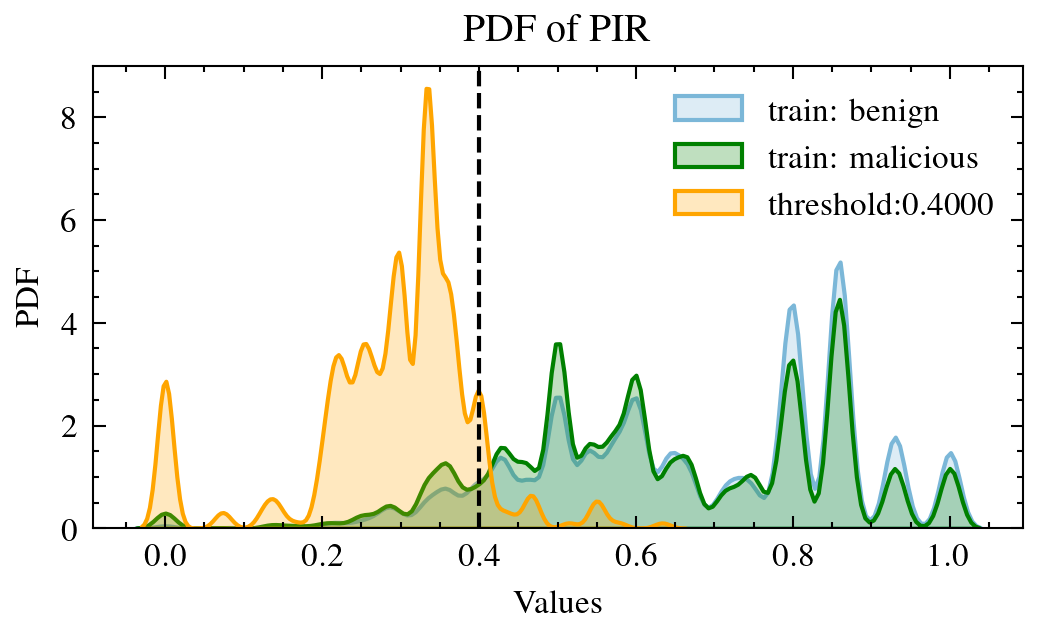

Threshold for the 90th percentile: 0.4000


In [60]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scienceplots # 如果不存在，需要pip install scienceplots
plt.style.available # 查看可用的样式    
plt.style.use(['science','ieee']) # 选择一个样式
# 示例数据
hist_data_white_tr =[0.5833333333333334, 0.6, 0.35714285714285715, 0.35714285714285715, 0.35714285714285715, 0.35714285714285715, 0.2857142857142857, 0.3333333333333333, 0.2, 0.5, 0.5454545454545454, 0.5, 0.4666666666666667, 0.35714285714285715, 0.4666666666666667, 0.35714285714285715, 0.5, 0.3076923076923077, 0.35714285714285715, 0.8571428571428571, 0.8, 0.8571428571428571, 0.7333333333333333, 0.8, 0.8571428571428571, 0.6, 0.5, 0.6, 0.42857142857142855, 0.75, 0.7142857142857143, 0.8571428571428571, 1.0, 0.9285714285714286, 0.7333333333333333, 0.8, 0.6428571428571429, 0.4, 0.5714285714285714, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6666666666666666, 0.6, 0.5, 0.8571428571428571, 0.8, 0.8571428571428571, 0.6428571428571429, 0.8, 0.8571428571428571, 0.9285714285714286, 0.8, 0.6666666666666666, 0.9285714285714286, 0.8571428571428571, 0.8, 0.6428571428571429, 0.7333333333333333, 0.8571428571428571, 0.7857142857142857, 0.8, 0.8571428571428571, 0.7692307692307693, 0.2857142857142857, 0.8, 0.8571428571428571, 0.9333333333333333, 0.9285714285714286, 0.8571428571428571, 0.6153846153846154, 0.5384615384615384, 0.5, 0.5, 0.38461538461538464, 0.4, 0.7142857142857143, 0.8, 0.9285714285714286, 0.8666666666666667, 0.8, 1.0, 0.8, 0.8571428571428571, 0.5384615384615384, 0.8571428571428571, 0.5, 0.7142857142857143, 0.6, 0.8, 0.7142857142857143, 0.9333333333333333, 0.8571428571428571, 0.8, 0.8571428571428571, 0.6428571428571429, 0.8571428571428571, 0.8666666666666667, 0.6666666666666666, 0.5, 0.6153846153846154, 0.6, 0.35714285714285715, 0.5833333333333334, 0.5384615384615384, 0.8571428571428571, 1.0, 0.6666666666666666, 0.6, 0.35714285714285715, 0.38461538461538464, 0.4444444444444444, 0.5, 0.8571428571428571, 0.8, 0.5, 0.7333333333333333, 0.42857142857142855, 0.5, 0.5714285714285714, 0.6, 0.4666666666666667, 0.5, 0.7333333333333333, 0.6666666666666666, 0.9285714285714286, 0.8, 0.8571428571428571, 0.7857142857142857, 0.8571428571428571, 1.0, 0.6428571428571429, 0.9333333333333333, 0.42857142857142855, 0.8571428571428571, 0.6, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8, 0.8571428571428571, 0.8, 0.8571428571428571, 0.7857142857142857, 0.8571428571428571, 1.0, 0.8571428571428571, 0.6, 0.8571428571428571, 0.8, 0.6666666666666666, 0.5, 0.8571428571428571, 0.8571428571428571, 0.9285714285714286, 0.8, 0.8571428571428571, 0.5, 0.5384615384615384, 0.7857142857142857, 0.7333333333333333, 0.8, 0.9285714285714286, 0.8571428571428571, 0.8, 0.8571428571428571, 0.8, 0.42857142857142855, 0.5, 0.5, 0.5, 0.4, 0.5, 0.5714285714285714, 0.5, 0.5714285714285714, 0.0, 0.5, 0.5714285714285714, 0.5, 0.5, 0.0, 0.5, 0.5, 0.8571428571428571, 0.7333333333333333, 0.8571428571428571, 0.42857142857142855, 0.5384615384615384, 0.5, 0.5454545454545454, 0.45454545454545453, 0.45454545454545453, 0.6666666666666666, 0.6, 0.5, 0.9285714285714286, 0.8, 0.5, 0.8571428571428571, 0.7333333333333333, 0.6428571428571429, 0.5333333333333333, 0.5333333333333333, 0.625, 0.8571428571428571, 0.6, 0.8571428571428571, 0.8571428571428571, 0.7333333333333333, 0.8571428571428571, 0.8, 0.8571428571428571, 0.8571428571428571, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 0.9285714285714286, 0.8, 0.5384615384615384, 0.8571428571428571, 1.0, 0.42857142857142855, 0.8571428571428571, 0.8, 0.45454545454545453, 0.6, 0.5, 0.75, 0.8571428571428571, 0.8, 0.5384615384615384, 0.8571428571428571, 1.0, 0.8571428571428571, 0.8666666666666667, 0.8, 0.6, 0.5714285714285714, 0.6, 0.5333333333333333, 0.6, 0.4666666666666667, 0.6428571428571429, 0.8571428571428571, 0.8, 0.8, 0.5384615384615384, 0.6, 0.2857142857142857, 0.9285714285714286, 0.9333333333333333, 0.8571428571428571, 0.6, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.6363636363636364, 0.4666666666666667, 0.5333333333333333, 0.7857142857142857, 0.8, 0.5833333333333334, 0.5714285714285714, 0.5384615384615384, 0.6, 0.6428571428571429, 0.5384615384615384, 0.35714285714285715, 1.0, 0.8, 0.8571428571428571, 0.6428571428571429, 1.0, 0.8, 0.5, 0.6, 0.5, 1.0, 0.8, 0.8, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8666666666666667, 0.6666666666666666, 1.0, 0.8571428571428571, 1.0, 0.7857142857142857, 0.9333333333333333, 0.8, 0.35714285714285715, 0.8571428571428571, 0.6, 0.8571428571428571, 0.6153846153846154, 0.6666666666666666, 0.5714285714285714, 0.5833333333333334, 0.6666666666666666, 0.6, 0.5, 0.35714285714285715, 0.5384615384615384, 0.5, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.9333333333333333, 0.7142857142857143, 0.9285714285714286, 0.7857142857142857, 0.9333333333333333, 0.8, 0.5384615384615384, 0.8571428571428571, 1.0, 0.23076923076923078, 0.5, 0.5384615384615384, 0.8571428571428571, 1.0, 0.9285714285714286, 0.8, 0.8571428571428571, 0.6428571428571429, 0.8666666666666667, 0.75, 0.75, 0.3333333333333333, 0.6666666666666666, 0.75, 0.4444444444444444, 0.75, 0.75, 0.5, 0.75, 0.75, 0.3333333333333333, 0.25, 0.4166666666666667, 0.6428571428571429, 0.6, 0.5, 0.6, 0.6, 0.5384615384615384, 0.4666666666666667, 0.8571428571428571, 0.8666666666666667, 0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 0.8, 0.5, 0.5714285714285714, 0.5714285714285714, 0.6, 0.4666666666666667, 0.5, 0.5333333333333333, 0.6, 0.5384615384615384, 0.6428571428571429, 0.8, 0.6666666666666666, 0.5714285714285714, 0.35714285714285715, 0.7857142857142857, 0.7333333333333333, 0.75, 0.5384615384615384, 0.8571428571428571, 1.0, 0.42857142857142855, 0.5384615384615384, 0.42857142857142855, 0.42857142857142855, 0.35714285714285715, 0.5714285714285714, 0.3333333333333333, 0.4, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.38461538461538464, 0.5, 0.6, 0.8, 0.2857142857142857, 0.5714285714285714, 0.9285714285714286, 0.8571428571428571, 1.0, 0.8571428571428571, 0.6, 0.8571428571428571, 0.5714285714285714, 0.3076923076923077, 0.5833333333333334, 0.7142857142857143, 0.7333333333333333, 0.6666666666666666, 0.5454545454545454, 0.5, 1.0, 0.8, 0.6, 0.5, 0.5, 0.5, 0.9285714285714286, 0.9333333333333333, 0.8, 0.6428571428571429, 0.8571428571428571, 1.0, 0.8571428571428571, 0.7333333333333333, 0.9285714285714286, 0.8, 0.8, 0.7142857142857143, 0.8571428571428571, 1.0, 0.7857142857142857, 0.6923076923076923, 0.8, 0.5454545454545454, 0.42857142857142855, 0.7142857142857143, 0.5333333333333333, 0.4, 0.46153846153846156, 0.4, 0.9285714285714286, 0.8, 0.6, 0.42857142857142855, 0.3333333333333333, 0.4166666666666667, 0.45454545454545453, 0.5384615384615384, 0.42857142857142855, 0.6, 0.6363636363636364, 0.375, 0.0, 0.5, 0.5, 0.42857142857142855, 0.3333333333333333, 0.6, 0.6428571428571429, 0.3333333333333333, 0.4666666666666667, 0.5714285714285714, 0.6428571428571429, 0.8, 0.8571428571428571, 0.7142857142857143, 0.7333333333333333, 0.8571428571428571, 0.7142857142857143, 0.8, 0.8571428571428571, 0.38461538461538464, 0.36363636363636365, 0.5, 0.75, 0.5384615384615384, 0.8571428571428571, 1.0, 0.6666666666666666, 0.6, 0.35714285714285715, 0.5714285714285714, 0.6428571428571429, 0.5384615384615384, 0.5, 0.5833333333333334, 0.42857142857142855, 0.5, 0.4, 0.8571428571428571, 0.9333333333333333, 0.42857142857142855, 0.6666666666666666, 0.6, 0.35714285714285715, 0.35714285714285715, 0.5, 0.6, 0.42857142857142855, 0.7857142857142857, 0.8, 0.8571428571428571, 0.8333333333333334, 0.42857142857142855, 0.7142857142857143, 0.6428571428571429, 0.8, 0.8571428571428571, 0.7857142857142857, 0.8, 0.8571428571428571, 0.9285714285714286, 0.8, 0.8, 0.38461538461538464, 0.42857142857142855, 0.75, 0.9285714285714286, 0.8, 0.8571428571428571, 0.4444444444444444, 0.75, 0.5555555555555556, 0.7, 0.6, 0.5555555555555556, 0.5555555555555556, 0.3333333333333333, 0.375, 0.375, 0.42857142857142855, 0.5833333333333334, 0.7857142857142857, 0.8666666666666667, 0.8, 1.0, 0.6666666666666666, 0.38461538461538464, 0.6, 0.2857142857142857, 0.7857142857142857, 0.6666666666666666, 0.8, 0.7857142857142857, 0.8571428571428571, 0.8, 0.7857142857142857, 0.8, 0.8, 1.0, 0.8, 0.6428571428571429, 0.3333333333333333, 0.7, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.8571428571428571, 0.8, 1.0, 0.8, 0.8571428571428571, 0.5333333333333333, 0.6666666666666666, 0.8571428571428571, 0.8, 0.6666666666666666, 0.6428571428571429, 0.7333333333333333, 0.7333333333333333, 0.7857142857142857, 0.8, 0.8, 0.6428571428571429, 0.4, 0.3333333333333333, 0.5384615384615384, 1.0, 0.8, 0.8571428571428571, 0.7857142857142857, 0.8, 0.8, 0.8571428571428571, 0.8, 0.8, 0.6923076923076923, 0.8, 0.6428571428571429, 0.8, 0.6428571428571429, 0.8, 0.7142857142857143, 0.8666666666666667, 0.8, 0.9285714285714286, 0.8571428571428571, 0.8, 0.75, 0.38461538461538464, 0.6, 0.35714285714285715, 1.0, 0.8, 0.8, 1.0, 0.8571428571428571, 1.0, 0.6, 0.26666666666666666, 1.0, 0.8666666666666667, 0.8571428571428571, 0.42857142857142855, 0.2857142857142857, 0.7857142857142857, 0.7333333333333333, 0.8571428571428571, 0.8571428571428571, 0.8, 0.8, 0.8571428571428571, 0.8571428571428571, 1.0, 0.35714285714285715, 0.8571428571428571, 0.8666666666666667, 0.5, 0.5384615384615384, 0.42857142857142855, 1.0, 0.8, 0.6666666666666666, 0.6363636363636364, 0.3, 0.5454545454545454, 0.5454545454545454, 0.23076923076923078, 0.5, 0.46153846153846156, 0.35714285714285715, 0.4666666666666667, 0.5, 0.6, 0.5, 0.6, 0.9285714285714286, 0.8666666666666667, 0.9285714285714286, 0.8, 0.8571428571428571, 0.6428571428571429, 0.9333333333333333, 0.5714285714285714, 0.5333333333333333, 0.5333333333333333, 0.5, 0.8571428571428571, 0.8, 0.8571428571428571, 0.5, 0.6, 0.6363636363636364, 0.7, 0.5, 0.6428571428571429, 0.5714285714285714, 0.6428571428571429, 0.75, 0.42857142857142855, 0.3333333333333333, 0.6666666666666666, 0.5714285714285714, 0.5333333333333333, 0.5, 0.8571428571428571, 0.8666666666666667, 0.8571428571428571, 0.5, 0.6666666666666666, 0.9285714285714286, 0.6, 0.6666666666666666, 1.0, 0.8, 0.8571428571428571, 0.5384615384615384, 0.6428571428571429, 0.8571428571428571, 1.0, 1.0, 0.8571428571428571, 0.8, 0.8571428571428571, 0.8, 0.9285714285714286, 0.7142857142857143, 0.8571428571428571, 0.8666666666666667, 0.7857142857142857, 0.8, 0.8571428571428571, 0.5714285714285714, 0.6428571428571429, 0.6666666666666666, 0.5714285714285714, 0.5, 0.4666666666666667, 0.4666666666666667, 0.8571428571428571, 0.8, 0.5714285714285714, 0.5714285714285714, 0.6, 0.5, 0.6, 0.6, 0.2857142857142857, 0.8571428571428571, 0.8666666666666667, 0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 1.0, 0.9285714285714286, 0.8, 1.0, 0.7857142857142857, 0.6, 0.5714285714285714, 0.5714285714285714, 0.4166666666666667, 0.5, 0.6, 0.8, 0.75, 0.42857142857142855, 0.42857142857142855, 0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 0.7857142857142857, 0.5714285714285714, 0.8571428571428571, 1.0, 0.8571428571428571, 0.6666666666666666, 0.8571428571428571, 0.8571428571428571, 0.6, 0.6666666666666666, 0.8571428571428571, 0.8666666666666667, 0.8571428571428571, 0.5, 0.5714285714285714, 0.6, 0.5333333333333333, 0.6, 0.4666666666666667, 0.6428571428571429, 0.8571428571428571, 0.8666666666666667, 0.6666666666666666, 0.5714285714285714, 0.6153846153846154, 0.7142857142857143, 0.5, 0.5, 0.6, 1.0, 0.9333333333333333, 0.6666666666666666, 0.4166666666666667, 0.3076923076923077, 0.42857142857142855, 0.5, 0.6, 0.5, 0.5714285714285714, 0.5833333333333334, 0.4, 0.6363636363636364, 0.4, 0.5555555555555556, 0.5714285714285714, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8, 0.5384615384615384, 0.8571428571428571, 1.0, 0.46153846153846156, 0.5, 0.8571428571428571, 0.8666666666666667, 0.8, 0.7142857142857143, 0.8666666666666667, 0.8, 0.5833333333333334, 0.5, 0.7333333333333333, 0.4, 0.5, 0.5, 0.5, 1.0, 0.9333333333333333, 0.8571428571428571, 0.8, 0.6666666666666666, 1.0, 0.8, 0.8571428571428571, 0.7333333333333333, 0.8571428571428571, 0.7857142857142857, 0.8, 0.9285714285714286, 0.8, 0.6666666666666666, 0.6, 0.5, 0.9285714285714286, 0.8, 0.8571428571428571, 0.8571428571428571, 0.8, 0.8, 1.0, 0.8, 0.8571428571428571, 0.8, 0.8, 0.6, 0.8571428571428571, 0.8666666666666667, 0.8571428571428571, 0.8571428571428571, 0.8, 0.8571428571428571, 0.9285714285714286, 0.8, 0.8, 1.0, 0.9333333333333333, 0.8571428571428571, 0.8571428571428571, 0.8666666666666667, 0.7857142857142857, 0.8666666666666667, 0.5384615384615384, 0.8571428571428571, 1.0, 0.2857142857142857, 0.8571428571428571, 0.8666666666666667, 0.5, 0.38461538461538464, 0.8571428571428571, 0.8, 0.8571428571428571, 0.42857142857142855, 0.75, 0.8571428571428571, 0.8, 0.6666666666666666, 1.0, 0.8, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 1.0, 0.9285714285714286, 0.8, 0.8571428571428571, 0.42857142857142855, 0.21428571428571427, 0.7142857142857143, 0.8, 0.8, 0.8571428571428571, 0.8571428571428571, 1.0, 0.5, 0.8571428571428571, 0.8, 0.8571428571428571, 0.6428571428571429, 0.5714285714285714, 0.4666666666666667, 0.5714285714285714, 0.3333333333333333, 0.5714285714285714, 0.4666666666666667, 0.5714285714285714, 0.4, 0.42857142857142855, 0.5, 0.42857142857142855, 0.5714285714285714, 0.3333333333333333, 0.38461538461538464, 0.375, 0.2857142857142857, 0.42857142857142855, 0.3333333333333333, 0.7142857142857143, 0.6, 0.7857142857142857, 0.8, 0.8571428571428571, 0.6363636363636364, 0.7, 0.25, 0.26666666666666666, 0.8571428571428571, 0.8571428571428571, 1.0, 0.9285714285714286, 0.8, 0.8571428571428571, 0.8571428571428571, 0.9333333333333333, 0.5714285714285714, 0.8571428571428571, 1.0, 0.9285714285714286, 0.8, 0.8571428571428571, 0.9285714285714286, 0.8, 0.7142857142857143, 0.9333333333333333, 0.5384615384615384, 0.5714285714285714, 0.42857142857142855, 0.6666666666666666, 0.6, 0.5, 0.9285714285714286, 0.8666666666666667, 0.8, 0.8571428571428571, 0.6, 0.8571428571428571, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.75, 0.7857142857142857, 0.8, 0.8571428571428571, 0.35714285714285715, 0.42857142857142855, 0.4, 0.9285714285714286, 0.8, 0.8, 0.6428571428571429, 0.5384615384615384, 0.35714285714285715, 0.7857142857142857, 0.8, 0.8571428571428571, 0.8, 0.6666666666666666, 0.8571428571428571, 0.8, 0.6666666666666666, 0.4444444444444444, 0.4, 0.6, 1.0, 0.8, 0.8, 0.4166666666666667, 0.3333333333333333, 0.5, 0.7333333333333333, 0.6, 0.3333333333333333, 0.75, 0.3333333333333333, 1.0, 0.8, 0.5, 0.6, 0.4666666666666667, 0.5, 0.4444444444444444, 0.4444444444444444, 0.9285714285714286, 0.9333333333333333, 0.8571428571428571, 0.7142857142857143, 0.7333333333333333, 0.8, 0.6428571428571429, 0.8, 0.9285714285714286, 0.8, 0.5384615384615384, 0.8571428571428571, 1.0, 0.6, 0.4666666666666667, 0.5384615384615384, 0.8571428571428571, 1.0, 0.6363636363636364, 0.5714285714285714, 0.5, 0.8571428571428571, 0.8, 0.8, 0.8571428571428571, 0.8666666666666667, 0.6666666666666666, 0.5714285714285714, 0.4, 0.8571428571428571, 0.8666666666666667, 1.0, 0.8666666666666667, 0.8, 0.8571428571428571, 0.8, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.7142857142857143, 0.8666666666666667, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8, 0.8571428571428571, 0.5333333333333333, 0.8, 0.6428571428571429, 0.8, 0.8571428571428571, 0.5714285714285714, 0.8571428571428571, 0.9333333333333333, 0.8, 0.8571428571428571, 0.7333333333333333, 0.8571428571428571, 0.21428571428571427, 0.2857142857142857, 0.5714285714285714, 0.5384615384615384, 0.5, 0.9285714285714286, 0.8, 0.8571428571428571, 0.5833333333333334, 0.4, 0.8571428571428571, 0.8571428571428571, 0.35714285714285715, 0.7142857142857143, 0.5384615384615384, 0.5555555555555556, 0.5555555555555556, 0.5384615384615384, 0.5555555555555556, 0.26666666666666666, 0.38461538461538464, 0.2222222222222222, 0.6, 0.5384615384615384, 0.4666666666666667, 0.2857142857142857, 0.5833333333333334, 0.6153846153846154, 0.6666666666666666, 0.8571428571428571, 0.8, 0.8, 0.5714285714285714, 0.6, 0.6, 0.4666666666666667, 0.6428571428571429, 0.6153846153846154, 0.5333333333333333, 0.5333333333333333, 0.6363636363636364, 0.9285714285714286, 0.8, 1.0, 0.8, 0.9285714285714286, 0.6, 0.8571428571428571, 0.6153846153846154, 0.6, 0.35714285714285715, 0.8571428571428571, 0.9333333333333333, 0.8571428571428571, 0.8, 0.7333333333333333, 1.0, 0.8, 0.8571428571428571, 0.9333333333333333, 0.42857142857142855, 0.4666666666666667, 0.5333333333333333, 0.42857142857142855, 0.5714285714285714, 0.5454545454545454, 0.8571428571428571, 0.8, 0.8, 0.9285714285714286, 0.8, 0.8, 0.5714285714285714, 0.4666666666666667, 0.4, 0.2, 0.46153846153846156, 0.8571428571428571, 0.9333333333333333, 0.75, 0.6153846153846154, 0.6666666666666666, 0.42857142857142855, 0.2857142857142857, 0.4666666666666667, 0.4666666666666667, 0.2857142857142857, 0.5, 0.5, 0.38461538461538464, 0.42857142857142855, 0.75, 0.7142857142857143, 0.8, 0.8, 0.7857142857142857, 0.8, 0.8571428571428571, 0.5, 0.6, 0.6428571428571429, 0.5714285714285714, 0.42857142857142855, 0.5714285714285714, 0.5, 0.5333333333333333, 0.5, 0.7333333333333333, 0.4, 0.5384615384615384, 1.0, 0.8, 0.5714285714285714, 0.5, 0.6, 0.6, 0.6, 0.5, 0.8571428571428571, 0.9333333333333333, 0.8571428571428571, 0.45454545454545453, 0.6, 0.35714285714285715, 0.5384615384615384, 0.8571428571428571, 1.0, 0.2857142857142857, 0.6428571428571429, 0.8666666666666667, 0.8, 0.8571428571428571, 0.8, 0.8571428571428571, 0.45454545454545453, 0.7857142857142857, 0.8666666666666667, 0.8571428571428571, 0.75, 0.42857142857142855, 0.5714285714285714, 0.42857142857142855, 0.7142857142857143, 0.8, 0.8571428571428571, 0.7333333333333333, 0.6666666666666666, 0.6, 0.35714285714285715, 0.42857142857142855, 0.7142857142857143, 0.8, 0.5833333333333334, 0.6428571428571429, 0.8571428571428571, 1.0, 0.6428571428571429, 0.8571428571428571, 1.0, 0.9285714285714286, 0.8, 0.8571428571428571, 0.9333333333333333, 0.5, 0.4666666666666667, 0.6666666666666666, 0.6, 0.5, 0.7142857142857143, 0.8, 0.8, 0.8571428571428571, 0.8, 0.8571428571428571, 0.9285714285714286, 0.6, 0.8571428571428571, 1.0, 0.8, 0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 0.6153846153846154, 0.8571428571428571, 0.8666666666666667, 0.7142857142857143, 0.8, 0.8, 0.9285714285714286, 0.8571428571428571, 1.0, 0.6428571428571429, 0.8, 0.8, 1.0, 0.8, 0.8571428571428571, 0.8571428571428571, 0.5333333333333333, 0.8571428571428571, 0.5384615384615384, 0.8571428571428571, 0.8, 0.6428571428571429, 0.9333333333333333, 0.5555555555555556, 0.7, 0.6, 0.375, 0.5555555555555556, 0.5555555555555556, 0.375, 0.5, 0.6666666666666666, 0.35714285714285715, 0.8571428571428571, 0.8666666666666667, 0.42857142857142855, 0.9285714285714286, 0.8, 0.7142857142857143, 0.8, 0.42857142857142855, 0.25, 0.5, 1.0, 0.9333333333333333, 0.42857142857142855, 0.6428571428571429, 0.5384615384615384, 0.35714285714285715, 0.5, 0.4666666666666667, 0.9285714285714286, 0.7333333333333333, 0.8571428571428571, 0.8, 0.7857142857142857, 0.8, 0.8, 0.6666666666666666, 0.5714285714285714, 0.625, 0.42857142857142855, 1.0, 0.9333333333333333, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.6666666666666666, 0.9285714285714286, 0.8666666666666667, 0.7333333333333333, 0.5, 0.42857142857142855, 0.42857142857142855, 0.5384615384615384, 0.8571428571428571, 1.0, 0.7857142857142857, 0.8, 0.6666666666666666, 0.5714285714285714, 0.42857142857142855, 0.35714285714285715, 0.5714285714285714, 0.5384615384615384, 0.5384615384615384, 0.4666666666666667, 0.5, 0.3333333333333333, 0.8571428571428571, 0.6, 0.8, 0.7857142857142857, 0.8666666666666667, 0.6428571428571429, 0.5333333333333333, 0.5333333333333333, 0.6, 0.4666666666666667, 0.6428571428571429, 0.9285714285714286, 0.6, 0.45454545454545453, 0.5384615384615384, 0.8571428571428571, 1.0, 0.42857142857142855, 0.5384615384615384, 0.8571428571428571, 1.0, 1.0, 0.8666666666666667, 0.42857142857142855, 0.75, 0.5, 0.18181818181818182, 0.42857142857142855, 0.6666666666666666, 0.6, 0.8571428571428571, 0.8, 0.8, 0.75, 1.0, 0.8666666666666667, 0.8, 0.9285714285714286, 0.6666666666666666, 0.7333333333333333, 0.6153846153846154, 0.5384615384615384, 0.5, 0.8571428571428571, 0.9166666666666666, 0.7142857142857143, 0.7333333333333333, 0.8, 1.0, 0.8, 0.8, 0.6428571428571429, 0.42857142857142855, 0.42857142857142855, 0.9285714285714286, 0.8, 0.9285714285714286, 0.8571428571428571, 0.8571428571428571, 0.7857142857142857, 0.8571428571428571, 0.9333333333333333, 0.8, 0.9285714285714286, 0.9333333333333333, 0.42857142857142855, 0.6428571428571429, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6428571428571429, 0.8666666666666667, 0.8571428571428571, 0.8571428571428571, 0.8, 0.6666666666666666, 0.9285714285714286, 0.6666666666666666, 0.8571428571428571, 0.7857142857142857, 0.8571428571428571, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 0.42857142857142855, 0.5714285714285714, 0.5714285714285714, 0.6428571428571429, 0.5, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.7333333333333333, 0.4, 0.42857142857142855, 0.6428571428571429, 0.5384615384615384, 0.35714285714285715, 0.8571428571428571, 0.6, 0.8, 0.9285714285714286, 0.8, 0.8571428571428571, 0.7142857142857143, 0.7333333333333333, 0.8571428571428571, 0.35714285714285715, 0.5, 0.5, 0.5, 0.8571428571428571, 0.9333333333333333, 0.5, 0.6, 0.35714285714285715, 1.0, 0.9333333333333333, 0.7857142857142857, 0.8, 0.8571428571428571, 0.9285714285714286, 0.6, 0.5, 0.21428571428571427, 0.2857142857142857, 0.45454545454545453, 0.4, 0.5, 0.8571428571428571, 0.8, 0.7857142857142857, 0.8, 0.8, 0.8571428571428571, 0.8571428571428571, 0.8, 0.8571428571428571, 0.6666666666666666, 0.42857142857142855, 0.6428571428571429, 0.8666666666666667, 0.8571428571428571, 0.9285714285714286, 0.8666666666666667, 0.8, 0.5384615384615384, 0.8571428571428571, 1.0, 0.8571428571428571, 0.8666666666666667, 0.6, 0.5, 0.42857142857142855, 0.9285714285714286, 0.9333333333333333, 0.42857142857142855, 0.5, 0.5714285714285714, 0.4, 0.35714285714285715, 1.0, 0.9333333333333333, 0.6428571428571429, 0.8, 0.8, 0.7142857142857143, 0.8666666666666667, 0.5555555555555556, 0.7, 0.6, 0.4, 0.5555555555555556, 0.5, 0.8571428571428571, 0.4666666666666667, 0.6666666666666666, 0.9285714285714286, 0.8, 0.6, 0.6428571428571429, 0.5384615384615384, 0.5, 0.7857142857142857, 0.8, 0.8, 0.45454545454545453, 0.5, 0.42857142857142855, 0.5714285714285714, 0.5, 0.5833333333333334, 0.5714285714285714, 0.08333333333333333, 0.6666666666666666, 0.6, 0.5, 0.5384615384615384, 0.6428571428571429, 0.8, 0.8571428571428571, 0.4, 0.45454545454545453, 0.6, 0.5555555555555556, 0.5555555555555556, 0.2727272727272727, 0.4, 0.3, 0.3333333333333333, 0.3, 0.4, 0.3, 0.2727272727272727, 0.375, 0.4, 0.4444444444444444, 0.4, 0.3333333333333333, 0.5555555555555556, 0.4, 0.5, 0.6, 0.5, 0.6428571428571429, 0.5714285714285714, 0.5833333333333334, 0.5, 0.6, 0.6, 0.6, 0.5, 0.4, 0.6, 0.6428571428571429, 0.42857142857142855, 0.26666666666666666, 0.5833333333333334, 0.5, 0.4, 0.4, 0.2857142857142857, 0.5714285714285714, 0.5, 0.38461538461538464, 0.5714285714285714, 0.4, 0.42857142857142855, 0.9285714285714286, 0.8, 0.8571428571428571, 0.8, 0.6, 0.6666666666666666, 0.6, 0.5, 0.6428571428571429, 0.9333333333333333, 0.6, 0.8571428571428571, 0.8, 0.8571428571428571, 0.5714285714285714, 0.4, 0.5, 0.3333333333333333, 0.5714285714285714, 0.4166666666666667, 0.4, 0.3076923076923077, 0.5714285714285714, 0.8571428571428571, 1.0, 0.75, 1.0, 0.8, 0.7142857142857143, 0.8, 0.8571428571428571, 0.2857142857142857, 1.0, 0.7333333333333333, 0.8571428571428571, 0.7857142857142857, 0.8571428571428571, 1.0, 0.7142857142857143, 0.8666666666666667, 0.6666666666666666, 0.3333333333333333, 0.4, 0.5, 0.6, 0.5714285714285714, 0.6428571428571429, 0.8, 0.6666666666666666, 0.8571428571428571, 0.8571428571428571, 1.0, 0.6153846153846154, 0.6, 0.42857142857142855, 0.5384615384615384, 0.4666666666666667, 0.42857142857142855, 0.8571428571428571, 0.8, 0.8, 0.6923076923076923, 0.8, 0.8571428571428571, 0.8, 0.6666666666666666, 1.0, 1.0, 0.7142857142857143, 0.8666666666666667, 0.8, 0.6153846153846154, 0.5384615384615384, 0.5, 0.7857142857142857, 0.7333333333333333, 0.8, 0.9285714285714286, 0.8, 0.8571428571428571, 0.8571428571428571, 0.8, 0.8571428571428571, 0.7142857142857143, 0.8, 0.8571428571428571, 0.42857142857142855, 0.6428571428571429, 0.4666666666666667, 0.5, 0.6428571428571429, 0.4666666666666667, 0.5833333333333334, 0.9285714285714286, 0.8666666666666667, 0.6428571428571429, 0.6, 0.6428571428571429, 0.5714285714285714, 0.4666666666666667, 0.5714285714285714, 0.4666666666666667, 0.35714285714285715, 0.4666666666666667, 0.5714285714285714, 0.3333333333333333, 0.2857142857142857, 0.5, 0.4, 0.35714285714285715, 0.3333333333333333, 0.5, 0.26666666666666666, 0.42857142857142855, 0.5714285714285714, 0.3333333333333333, 0.35714285714285715, 0.4666666666666667, 0.5714285714285714, 0.21428571428571427, 0.5384615384615384, 0.45454545454545453, 0.35714285714285715, 0.5, 0.6, 0.6, 0.5, 0.6, 0.25, 0.7857142857142857, 0.8, 0.7142857142857143, 0.8, 0.6, 0.8571428571428571, 0.8, 0.5, 0.45454545454545453, 0.5714285714285714, 0.5, 0.6428571428571429, 0.8, 0.8, 0.38461538461538464, 0.5, 0.6666666666666666, 0.5, 0.2857142857142857, 0.8, 0.8571428571428571, 0.5384615384615384, 0.4666666666666667, 0.7272727272727273, 0.46153846153846156, 0.5454545454545454, 0.8571428571428571, 0.8, 0.8571428571428571, 0.8666666666666667, 0.8571428571428571, 0.7857142857142857, 0.6666666666666666, 0.8571428571428571, 0.5384615384615384, 0.8571428571428571, 1.0, 0.9285714285714286, 0.8666666666666667, 0.6666666666666666, 0.75, 0.75, 0.6666666666666666, 0.75, 0.75, 0.5, 0.3333333333333333, 0.6666666666666666, 0.6363636363636364, 0.625, 0.75, 0.75, 0.75, 0.25, 0.5, 0.6428571428571429, 0.8, 0.8571428571428571, 1.0, 0.8, 0.8571428571428571, 0.8, 0.7857142857142857, 0.9333333333333333, 0.38461538461538464, 0.7857142857142857, 0.7333333333333333, 0.8, 0.6153846153846154, 0.6666666666666666, 0.5384615384615384, 0.42857142857142855, 0.5, 0.42857142857142855, 0.5, 0.9285714285714286, 0.8, 0.9285714285714286, 0.8666666666666667, 0.25, 1.0, 0.8, 0.9285714285714286, 0.9333333333333333, 0.9285714285714286, 0.8, 0.9285714285714286, 0.8666666666666667, 0.7857142857142857, 0.8666666666666667, 0.8, 0.8333333333333334, 0.9285714285714286, 0.6, 0.8571428571428571, 0.8571428571428571, 0.8, 0.6428571428571429, 0.5, 0.42857142857142855, 0.5, 0.6363636363636364, 0.4, 0.13333333333333333, 0.6428571428571429, 0.6, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.8, 0.8, 0.8571428571428571, 0.8, 0.8, 0.6153846153846154, 0.5833333333333334, 0.5384615384615384, 0.42857142857142855, 0.6153846153846154, 0.5384615384615384, 0.8571428571428571, 0.8, 0.4166666666666667, 0.4166666666666667, 0.3333333333333333, 0.5, 0.6, 0.4, 1.0, 0.9333333333333333, 0.9285714285714286, 0.8, 0.5833333333333334, 0.8571428571428571, 0.8, 0.5384615384615384, 0.8571428571428571, 1.0, 0.9285714285714286, 0.8666666666666667, 0.8]
hist_data_white_te = [0.9285714285714286, 0.6, 0.8, 0.6428571428571429, 0.5833333333333334, 0.8571428571428571, 0.8, 0.9285714285714286, 0.8, 0.8, 0.6666666666666666, 0.6, 0.35714285714285715, 0.6428571428571429, 0.8571428571428571, 0.8, 0.8571428571428571, 1.0, 0.9333333333333333, 0.7142857142857143, 0.8, 0.8571428571428571, 0.8571428571428571, 0.6, 0.35714285714285715, 0.6666666666666666, 0.6428571428571429, 0.8, 0.5, 0.35714285714285715, 0.3333333333333333, 0.4666666666666667, 0.5833333333333334, 0.8571428571428571, 0.0, 0.5, 0.5, 0.6, 0.6363636363636364, 0.8571428571428571, 0.14285714285714285, 0.5, 0.35714285714285715, 0.5, 0.5333333333333333, 0.5, 0.6666666666666666, 0.4, 0.5384615384615384, 0.5714285714285714, 0.6, 0.5, 0.6, 0.6666666666666666, 1.0, 0.8666666666666667, 0.35714285714285715, 0.5384615384615384, 0.5, 0.8571428571428571, 0.8666666666666667, 0.6428571428571429, 0.8, 0.8571428571428571, 0.8571428571428571, 0.9333333333333333, 0.8461538461538461, 0.7333333333333333, 1.0, 0.8, 0.75, 0.6428571428571429, 0.5, 0.5, 0.8571428571428571, 0.8, 0.5714285714285714, 0.45454545454545453, 0.4166666666666667, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.42857142857142855, 0.35714285714285715, 0.5384615384615384, 0.42857142857142855, 0.8571428571428571, 0.5, 0.7333333333333333, 0.8571428571428571, 0.8666666666666667, 0.8, 0.42857142857142855, 0.5, 0.5714285714285714, 0.6666666666666666, 0.6, 0.5, 0.6, 0.9285714285714286, 0.26666666666666666, 0.5555555555555556, 0.7, 0.6, 0.5555555555555556, 0.3333333333333333, 0.5, 0.5555555555555556, 0.5555555555555556, 0.5, 0.6666666666666666, 0.5555555555555556, 0.5555555555555556, 0.6428571428571429, 0.8, 0.8, 0.8571428571428571, 0.9333333333333333, 0.6, 0.9285714285714286, 0.8571428571428571, 0.8, 0.9285714285714286, 0.8571428571428571, 0.8, 0.8571428571428571, 0.8666666666666667, 0.8, 0.42857142857142855, 0.5, 0.6, 0.42857142857142855, 0.4444444444444444, 0.4, 0.75, 0.7142857142857143, 0.8666666666666667, 0.4166666666666667, 1.0, 0.8571428571428571, 0.5384615384615384, 0.4666666666666667, 0.5, 0.42857142857142855, 0.6428571428571429, 0.8, 0.4444444444444444, 0.36363636363636365, 0.36363636363636365, 0.5555555555555556, 0.5555555555555556, 0.5, 0.625, 0.8571428571428571, 0.8, 0.8571428571428571, 0.9285714285714286, 0.9333333333333333, 0.5384615384615384, 0.6, 0.8571428571428571, 0.8, 0.6666666666666666, 0.7857142857142857, 0.6666666666666666, 0.5333333333333333, 0.8571428571428571, 0.8, 0.7142857142857143, 0.8666666666666667, 0.8571428571428571, 0.7857142857142857, 0.42857142857142855, 0.5714285714285714, 0.4666666666666667, 0.4666666666666667, 0.42857142857142855, 0.6428571428571429, 0.9333333333333333, 0.6666666666666666, 0.8571428571428571, 0.8, 0.8571428571428571, 0.9285714285714286, 0.8, 0.8571428571428571, 0.6428571428571429, 0.9333333333333333, 0.8, 0.6428571428571429, 0.5384615384615384, 0.35714285714285715, 0.6428571428571429, 0.5, 0.35714285714285715, 0.6666666666666666, 0.6, 0.35714285714285715, 0.7857142857142857, 0.8666666666666667, 0.8571428571428571, 0.42857142857142855, 0.5, 0.5, 0.6666666666666666, 0.4666666666666667, 0.5, 0.3333333333333333, 0.8571428571428571, 0.8, 0.8571428571428571, 0.6666666666666666, 0.6, 0.35714285714285715, 0.7857142857142857, 0.9333333333333333, 0.5833333333333334, 0.6428571428571429, 0.5714285714285714, 0.35714285714285715, 0.3333333333333333, 0.5714285714285714, 0.5, 0.5714285714285714, 0.6428571428571429, 0.5714285714285714, 0.46153846153846156, 0.5, 0.5, 0.6428571428571429, 0.21428571428571427, 0.5555555555555556, 0.7, 0.6, 0.5555555555555556, 0.375, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.5, 0.375, 0.5, 0.5, 0.5555555555555556, 0.3333333333333333, 0.375, 0.2727272727272727, 0.4444444444444444, 0.5555555555555556, 0.3333333333333333, 0.4444444444444444, 0.375, 0.375, 0.9285714285714286, 0.8, 0.6428571428571429, 0.25, 0.6, 0.6, 0.6428571428571429, 0.8571428571428571, 1.0, 0.7857142857142857, 0.8571428571428571, 1.0, 1.0, 0.8, 0.8, 0.8571428571428571, 0.8666666666666667, 0.8, 0.8571428571428571, 0.9333333333333333, 0.75, 0.75, 0.7, 0.75, 0.75, 0.75, 0.45454545454545453, 0.75, 0.6666666666666666, 0.6666666666666666, 0.75, 0.75, 0.7, 0.25, 0.5, 0.06666666666666667, 0.0, 0.9285714285714286, 0.8, 0.5384615384615384, 0.8571428571428571, 1.0, 0.9285714285714286, 0.6, 0.8571428571428571, 0.8666666666666667, 0.8, 0.9285714285714286, 0.8666666666666667, 0.8571428571428571, 0.5384615384615384, 0.42857142857142855, 0.42857142857142855, 0.2857142857142857, 0.3333333333333333, 0.3333333333333333, 0.7857142857142857, 0.8666666666666667, 0.8, 0.6428571428571429, 0.8, 0.6363636363636364, 0.36363636363636365, 0.36363636363636365, 0.4166666666666667, 0.35714285714285715, 0.5, 1.0, 0.6, 0.45454545454545453, 0.4666666666666667, 0.21428571428571427, 0.7142857142857143, 0.6, 0.6666666666666666, 0.5, 0.6, 0.6428571428571429, 0.5, 0.35714285714285715, 0.5384615384615384, 0.8571428571428571, 1.0, 0.5833333333333334, 0.6428571428571429, 0.5333333333333333, 0.5333333333333333, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.4, 0.4, 0.5, 0.6, 0.5, 0.8571428571428571, 0.8666666666666667, 0.8571428571428571, 0.8666666666666667, 0.5833333333333334, 0.35714285714285715, 0.35714285714285715, 0.42857142857142855, 0.5, 0.6666666666666666, 0.6, 0.5, 0.7333333333333333, 0.75, 0.8571428571428571, 0.8571428571428571, 0.7857142857142857, 0.8666666666666667, 0.42857142857142855, 0.4666666666666667, 0.7777777777777778, 0.4444444444444444, 0.4444444444444444, 0.5714285714285714, 0.5333333333333333, 0.23076923076923078, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.5, 0.5, 0.5, 0.3, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.75, 0.75, 0.45454545454545453, 0.6666666666666666, 0.625, 0.3333333333333333, 0.75, 0.75, 0.25, 0.9285714285714286, 0.7857142857142857, 0.5, 0.7333333333333333, 0.3076923076923077, 0.5, 0.46153846153846156, 0.35714285714285715, 0.5, 0.6, 0.5, 0.6, 0.6, 0.5833333333333334, 0.6, 0.2857142857142857, 0.7857142857142857, 0.7333333333333333, 0.8571428571428571, 0.0, 0.75, 0.75, 0.5, 0.6, 0.35714285714285715, 0.8571428571428571, 0.8, 0.8571428571428571, 0.8571428571428571, 0.8666666666666667, 0.6666666666666666, 0.6428571428571429, 0.6, 0.6, 0.9285714285714286, 0.8, 0.6666666666666666, 0.5833333333333334, 0.5, 0.6, 0.6428571428571429, 0.13333333333333333, 0.6428571428571429, 0.8, 0.8571428571428571, 0.8571428571428571, 1.0, 0.46153846153846156, 0.8571428571428571, 0.8, 0.8571428571428571, 0.5454545454545454, 0.8571428571428571, 0.8, 0.42857142857142855, 0.42857142857142855, 0.4, 0.6, 0.5, 0.5333333333333333, 0.8571428571428571, 0.8, 0.35714285714285715, 0.5714285714285714, 0.6428571428571429, 0.5714285714285714, 0.4666666666666667, 0.2857142857142857, 0.4666666666666667, 0.5714285714285714, 0.4666666666666667, 0.5714285714285714, 0.3333333333333333, 0.42857142857142855, 0.26666666666666666, 0.2857142857142857, 0.3333333333333333, 0.42857142857142855, 0.4666666666666667, 0.2857142857142857, 0.3333333333333333, 0.42857142857142855, 0.5714285714285714, 0.2857142857142857, 0.4, 0.4, 0.7857142857142857, 0.6666666666666666, 0.2857142857142857, 0.5833333333333334, 1.0, 0.8, 0.4166666666666667, 0.6, 0.5, 0.45454545454545453, 0.6, 0.35714285714285715, 0.5714285714285714, 0.2, 0.2, 0.42857142857142855, 0.5, 0.2857142857142857, 0.35714285714285715, 0.5714285714285714, 0.5454545454545454, 0.42857142857142855, 0.4, 0.25, 1.0, 0.8, 0.9285714285714286, 0.8, 0.8, 0.8571428571428571, 0.7333333333333333, 0.8, 0.8571428571428571, 0.8, 0.8571428571428571, 0.42857142857142855, 0.5384615384615384, 0.5, 0.5, 0.5384615384615384, 0.35714285714285715, 0.8571428571428571, 0.8571428571428571, 0.8, 0.9285714285714286, 0.8, 0.8571428571428571, 0.9285714285714286, 0.8666666666666667, 0.8571428571428571, 0.7857142857142857, 0.6, 0.8, 0.5, 0.6, 0.4666666666666667, 0.6428571428571429, 0.5333333333333333, 0.6, 0.5384615384615384, 0.8571428571428571, 1.0, 0.6428571428571429, 0.4, 0.0, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.4666666666666667, 0.42857142857142855, 0.5, 0.42857142857142855, 0.5, 0.5, 0.6, 0.7857142857142857, 0.8, 0.8571428571428571, 0.7857142857142857, 0.6, 0.8, 0.42857142857142855, 0.45454545454545453, 0.21428571428571427, 0.3076923076923077, 0.5, 0.6153846153846154, 0.6, 0.7142857142857143, 0.6666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.5333333333333333, 0.75, 0.7, 0.7, 0.75, 0.7, 0.75, 0.3333333333333333, 0.6666666666666666, 0.75, 0.75, 0.75, 0.25, 0.5384615384615384, 0.8571428571428571, 1.0, 0.7857142857142857, 0.8666666666666667, 0.8, 0.45454545454545453, 0.6666666666666666, 0.6, 0.5, 0.42857142857142855, 0.6363636363636364, 0.4166666666666667, 0.5, 0.3333333333333333, 0.45454545454545453, 0.16666666666666666, 0.3333333333333333, 0.5, 0.26666666666666666, 0.35714285714285715, 0.5, 0.5, 0.6428571428571429, 0.9333333333333333, 0.6666666666666666, 0.8571428571428571, 0.8, 0.8571428571428571, 1.0, 0.8571428571428571, 1.0, 0.5555555555555556, 0.5, 0.4, 0.42857142857142855, 0.42857142857142855, 0.6, 0.5333333333333333, 0.5, 0.5333333333333333, 0.45454545454545453, 0.6153846153846154, 0.75, 0.6, 0.5, 0.6, 0.5, 0.35714285714285715, 0.3333333333333333, 0.0, 0.5, 0.5, 0.7, 0.3076923076923077, 0.6, 0.5714285714285714, 1.0, 0.9333333333333333, 0.8571428571428571, 0.9333333333333333, 0.8571428571428571, 0.4166666666666667, 0.6666666666666666, 0.5, 0.6, 0.5, 0.38461538461538464, 0.5, 0.5, 0.6666666666666666, 0.6, 0.35714285714285715, 0.8571428571428571, 0.8, 0.5384615384615384, 0.8571428571428571, 1.0, 0.6666666666666666, 0.45454545454545453, 0.2857142857142857, 0.5454545454545454, 0.8571428571428571, 0.8, 0.45454545454545453, 0.6, 0.5, 0.8571428571428571, 0.8, 0.8571428571428571, 0.8, 0.6, 0.5, 0.6, 0.42857142857142855, 0.5384615384615384, 0.5384615384615384, 0.8571428571428571, 1.0, 1.0, 0.7333333333333333, 0.6, 0.5714285714285714, 0.38461538461538464, 0.6, 0.5, 0.6, 0.6, 0.6428571428571429, 0.4166666666666667, 0.8571428571428571, 0.8, 0.8, 0.6153846153846154, 0.6666666666666666, 0.21428571428571427, 0.46153846153846156, 0.9285714285714286, 0.8, 0.8571428571428571, 0.6666666666666666, 0.6, 0.5714285714285714, 0.8571428571428571, 0.8666666666666667, 0.6666666666666666, 0.8571428571428571, 0.8666666666666667, 0.2857142857142857, 0.8571428571428571, 0.9333333333333333, 0.5, 0.6, 0.46153846153846156, 0.4166666666666667, 0.7857142857142857, 0.8, 0.8, 0.7142857142857143, 0.6666666666666666, 0.8, 0.7857142857142857, 0.8, 0.6666666666666666, 0.7857142857142857, 0.8571428571428571, 0.8, 0.75, 0.9285714285714286, 0.9333333333333333, 0.9285714285714286, 0.8666666666666667, 0.8571428571428571, 0.8571428571428571, 0.8, 0.8571428571428571, 0.6666666666666666, 0.6, 0.5, 0.23076923076923078, 0.2857142857142857, 0.9285714285714286, 0.8666666666666667, 0.7333333333333333, 0.75, 0.75, 0.6428571428571429, 0.9333333333333333, 0.8571428571428571, 0.5, 0.6, 0.7142857142857143, 0.8, 0.8571428571428571, 0.6428571428571429, 0.8, 0.8571428571428571, 0.5, 0.5714285714285714, 0.5, 0.5, 0.3333333333333333, 0.5, 0.5714285714285714, 0.5, 0.5, 0.5714285714285714, 0.5, 0.5, 0.5, 1.0, 0.8, 0.6, 0.42857142857142855, 0.4444444444444444, 0.7777777777777778, 0.6, 0.9285714285714286, 0.8, 0.7857142857142857, 0.8, 0.8, 0.7857142857142857, 0.7142857142857143, 0.5, 0.5, 0.7142857142857143, 0.8, 0.6666666666666666, 0.75, 0.75, 0.5714285714285714, 0.5, 0.6, 0.6, 0.4166666666666667, 0.5, 0.6, 0.6, 0.7857142857142857, 0.8, 0.75, 0.6428571428571429, 0.8571428571428571, 1.0, 0.6428571428571429, 0.7333333333333333, 0.8, 0.5384615384615384, 0.9285714285714286, 0.8666666666666667, 0.8571428571428571, 0.8666666666666667, 0.8571428571428571, 0.5, 0.5384615384615384, 0.35714285714285715, 0.42857142857142855, 0.35714285714285715, 0.6666666666666666, 0.6153846153846154, 0.5384615384615384, 0.35714285714285715, 0.8571428571428571, 0.8, 0.8571428571428571, 0.7142857142857143, 0.8, 0.8571428571428571, 0.7142857142857143, 0.8666666666666667, 0.42857142857142855, 0.38461538461538464, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.8571428571428571, 0.6, 0.45454545454545453, 0.6, 0.5, 0.5, 0.5714285714285714, 0.5, 0.5333333333333333, 0.6, 0.5, 0.6, 0.4, 0.5384615384615384, 0.9285714285714286, 0.8, 0.8571428571428571, 0.6428571428571429, 0.8571428571428571, 1.0, 0.5555555555555556, 0.5, 0.3333333333333333, 0.375, 0.5, 0.4, 0.375, 0.375, 0.375, 0.5, 0.6, 0.5, 0.45454545454545453, 0.3333333333333333, 0.45454545454545453, 0.6666666666666666, 0.6, 0.5, 0.6428571428571429, 0.8, 0.38461538461538464, 0.8571428571428571, 0.35714285714285715, 0.5714285714285714, 0.7857142857142857, 0.8, 0.8571428571428571, 0.42857142857142855, 0.6, 0.5, 0.42857142857142855, 1.0, 0.8, 0.6666666666666666, 0.7857142857142857, 0.8571428571428571, 1.0, 0.8571428571428571, 0.8571428571428571, 0.6, 1.0, 0.9333333333333333, 0.42857142857142855, 0.25, 0.5, 1.0, 0.8, 0.8571428571428571, 0.8666666666666667, 0.8571428571428571, 0.6153846153846154, 0.5384615384615384, 0.5, 0.6666666666666666, 0.45454545454545453, 0.6, 0.42857142857142855, 0.6, 0.5714285714285714, 0.6428571428571429, 0.8571428571428571, 0.3333333333333333, 0.5714285714285714, 0.5384615384615384, 0.42857142857142855, 0.5, 0.5714285714285714, 0.5, 0.7857142857142857, 0.8571428571428571, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 0.8571428571428571, 0.8666666666666667, 0.8, 0.42857142857142855, 0.5714285714285714, 0.4666666666666667, 0.6428571428571429, 0.26666666666666666, 0.2857142857142857, 0.3333333333333333, 0.5714285714285714, 0.3333333333333333, 0.5714285714285714, 0.3333333333333333, 0.42857142857142855, 0.3333333333333333, 0.5714285714285714, 0.4666666666666667, 0.5, 0.3333333333333333, 0.3333333333333333, 0.0, 0.5714285714285714, 0.3333333333333333, 0.35714285714285715, 0.3333333333333333, 0.2857142857142857, 0.46153846153846156, 0.5714285714285714, 0.42857142857142855, 0.45454545454545453, 0.5333333333333333, 0.5, 0.4666666666666667, 0.4666666666666667, 0.46153846153846156, 0.4666666666666667, 0.4, 0.35714285714285715, 0.5833333333333334, 0.9285714285714286, 0.8571428571428571, 0.5714285714285714, 1.0, 0.8571428571428571, 0.8, 0.45454545454545453, 0.4666666666666667, 0.2, 0.7142857142857143, 0.6666666666666666, 0.6666666666666666, 0.6428571428571429, 0.5, 0.6, 0.0, 0.5, 0.5, 0.5454545454545454, 0.8571428571428571, 0.6, 0.5714285714285714, 0.13333333333333333, 0.0, 0.42857142857142855, 0.5333333333333333, 0.5454545454545454, 0.5, 0.42857142857142855, 0.5, 0.6428571428571429, 0.5714285714285714, 0.5714285714285714, 0.6428571428571429, 0.8, 0.8, 0.6428571428571429, 0.8571428571428571, 0.8, 0.6, 0.5, 0.5833333333333334, 0.8571428571428571, 0.9333333333333333, 0.5, 0.25, 0.5, 0.9285714285714286, 0.8666666666666667, 0.8571428571428571, 0.8571428571428571, 0.8, 0.5714285714285714, 0.2857142857142857, 0.7857142857142857, 0.8571428571428571, 0.6666666666666666, 0.7142857142857143, 0.7333333333333333, 0.8571428571428571, 0.6666666666666666, 0.6, 0.42857142857142855, 0.8571428571428571, 0.7333333333333333, 0.5, 0.5333333333333333, 0.5, 0.6, 0.7142857142857143, 0.9333333333333333, 0.6428571428571429, 0.8, 0.8571428571428571, 0.5, 0.5, 0.5714285714285714, 0.5333333333333333, 0.5, 0.7333333333333333, 0.8571428571428571, 0.8, 0.6666666666666666, 1.0, 0.8, 0.7, 0.4444444444444444, 0.16666666666666666, 0.25, 0.42857142857142855, 0.5, 0.6666666666666666, 0.5333333333333333, 0.6428571428571429, 0.5, 0.6, 0.7142857142857143, 0.9333333333333333, 0.7142857142857143, 0.8, 0.8, 0.6428571428571429, 0.5384615384615384, 0.5714285714285714, 0.5, 0.35714285714285715, 0.5384615384615384, 0.6, 0.5, 0.2857142857142857, 0.5833333333333334, 0.8571428571428571, 0.8, 0.8571428571428571, 0.7857142857142857, 0.8571428571428571, 1.0, 0.7857142857142857, 0.8, 0.8571428571428571, 0.5384615384615384, 0.8571428571428571, 1.0, 0.9285714285714286, 0.8, 0.8571428571428571, 0.8, 0.8571428571428571, 0.7333333333333333, 0.8571428571428571, 0.6428571428571429, 0.8, 0.8, 0.5384615384615384, 0.5, 0.45454545454545453, 0.8571428571428571, 0.9285714285714286, 0.9285714285714286, 0.8, 0.8, 0.9285714285714286, 0.8, 0.8571428571428571, 0.9285714285714286, 0.8666666666666667, 0.8, 0.5384615384615384, 0.8571428571428571, 0.8666666666666667, 0.9285714285714286, 0.8571428571428571, 0.5, 0.8571428571428571, 1.0, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.6, 0.5, 0.6363636363636364, 0.5, 0.6666666666666666, 0.6, 0.35714285714285715, 0.8571428571428571, 0.8571428571428571, 0.5833333333333334, 0.5384615384615384, 0.5714285714285714, 0.5714285714285714, 0.75, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.7142857142857143, 0.4666666666666667, 0.6, 0.7142857142857143, 0.7333333333333333, 0.5333333333333333, 0.5714285714285714, 0.4166666666666667, 0.6, 0.4666666666666667, 0.5, 0.38461538461538464, 0.8571428571428571, 1.0, 0.5, 0.4666666666666667, 0.6, 0.6428571428571429, 0.8, 0.8, 0.8571428571428571, 0.8666666666666667, 0.25, 0.7272727272727273, 1.0, 0.7857142857142857, 1.0, 0.8571428571428571, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 0.35714285714285715, 0.35714285714285715, 0.5, 0.35714285714285715, 1.0, 0.8571428571428571, 0.75, 0.75, 0.75, 0.75, 0.3333333333333333, 0.3333333333333333, 0.7, 0.4166666666666667, 0.75, 0.6666666666666666, 0.75, 0.7272727272727273, 0.6666666666666666, 0.25, 0.5714285714285714, 0.5384615384615384, 0.8571428571428571, 0.8, 0.8571428571428571, 0.8, 0.6666666666666666, 0.46153846153846156, 0.0, 0.7857142857142857, 0.8666666666666667, 0.8, 0.5, 0.6153846153846154, 0.6, 0.35714285714285715, 0.5, 0.5714285714285714, 0.5, 0.6428571428571429, 0.8571428571428571, 0.6666666666666666, 0.9285714285714286, 0.8666666666666667, 0.8571428571428571, 0.42857142857142855, 0.5, 0.35714285714285715, 0.8571428571428571, 0.8666666666666667, 0.8, 0.5833333333333334, 0.8571428571428571, 0.8666666666666667, 0.8, 0.6428571428571429, 0.6666666666666666, 0.6, 0.46153846153846156, 0.8571428571428571, 0.8, 0.8571428571428571, 0.6666666666666666, 0.6, 0.5, 0.5714285714285714, 0.6666666666666666, 0.6, 0.5, 0.8571428571428571, 0.6666666666666666, 0.46153846153846156, 0.5, 0.5384615384615384, 0.8571428571428571, 1.0, 0.5555555555555556, 0.7, 0.6, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.75, 0.5, 0.5714285714285714, 0.8571428571428571, 0.8, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.6666666666666666, 0.8571428571428571, 0.8, 0.8571428571428571, 0.75, 0.25, 0.5, 0.7142857142857143, 0.8666666666666667, 0.8571428571428571, 0.75, 0.7857142857142857, 0.8, 0.8571428571428571, 0.8571428571428571, 0.7333333333333333, 0.7333333333333333, 0.35714285714285715, 0.35714285714285715, 0.42857142857142855, 0.7333333333333333, 0.42857142857142855, 0.5714285714285714, 0.7857142857142857, 0.8, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 1.0, 0.9285714285714286, 0.8, 0.6666666666666666, 0.9285714285714286, 0.8666666666666667, 0.5, 0.5454545454545454, 0.8571428571428571, 0.8666666666666667, 0.8, 0.42857142857142855, 0.5, 0.5384615384615384, 0.6428571428571429, 0.7142857142857143, 0.8571428571428571, 1.0, 0.7857142857142857, 0.8571428571428571, 1.0, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.42857142857142855, 0.15384615384615385, 0.6666666666666666, 0.75, 0.5555555555555556, 0.45454545454545453, 0.6, 0.35714285714285715, 0.42857142857142855, 0.5714285714285714, 0.3333333333333333, 0.5, 0.6, 0.35714285714285715, 0.8571428571428571, 0.8, 0.42857142857142855, 0.6, 0.5714285714285714, 0.5, 0.3333333333333333, 0.5333333333333333, 0.5833333333333334, 0.4, 0.5833333333333334, 0.6, 0.6, 0.6, 0.4666666666666667, 0.9285714285714286, 0.8, 0.14285714285714285, 0.0, 0.0, 0.45454545454545453, 0.4666666666666667, 0.5, 0.2857142857142857, 0.7142857142857143, 0.8, 0.8571428571428571, 0.8571428571428571, 0.8, 0.8571428571428571, 0.6428571428571429, 0.8, 0.8571428571428571, 0.6, 0.8, 0.5714285714285714, 0.5833333333333334, 0.5833333333333334, 0.5, 0.7333333333333333, 0.7142857142857143, 0.8, 0.8571428571428571, 0.7142857142857143, 0.9333333333333333, 0.8, 0.4, 0.5454545454545454, 0.38461538461538464, 1.0, 0.8, 0.8571428571428571, 0.8, 1.0, 0.8, 0.23076923076923078, 0.5, 0.5, 0.8571428571428571, 1.0, 0.7142857142857143, 0.8, 0.8571428571428571, 0.42857142857142855, 0.6666666666666666, 0.5714285714285714, 0.9285714285714286, 0.8571428571428571, 1.0, 0.7142857142857143, 0.8571428571428571, 1.0, 0.5714285714285714, 1.0, 0.8, 0.8571428571428571, 0.8, 0.8571428571428571, 0.8571428571428571, 0.8666666666666667, 0.8571428571428571, 0.42857142857142855, 1.0, 0.8, 0.6666666666666666, 0.5384615384615384, 0.5555555555555556, 0.375, 0.375, 0.5555555555555556, 0.6, 0.4166666666666667, 0.4166666666666667, 0.6428571428571429, 0.6428571428571429, 0.9090909090909091, 0.8333333333333334, 0.75, 0.8571428571428571, 0.8571428571428571, 1.0, 1.0, 0.7333333333333333, 0.8571428571428571, 0.8571428571428571, 0.7333333333333333, 0.6666666666666666, 0.9090909090909091, 0.3333333333333333, 0.9285714285714286, 0.8571428571428571, 1.0, 1.0, 0.8571428571428571, 0.8, 0.42857142857142855, 0.5, 0.5, 0.6, 0.5, 0.7333333333333333, 0.4, 0.8571428571428571, 0.6666666666666666, 0.8571428571428571, 0.5, 0.2857142857142857, 0.8571428571428571, 0.8, 0.8, 0.6153846153846154, 0.6, 0.38461538461538464, 0.5833333333333334, 0.42857142857142855, 0.4666666666666667, 0.5, 0.6153846153846154, 0.5384615384615384, 0.6, 0.5714285714285714, 0.9285714285714286, 0.8666666666666667, 0.8571428571428571, 0.9333333333333333, 0.8571428571428571, 0.8, 0.5714285714285714, 0.8571428571428571, 0.8571428571428571, 0.8, 0.8571428571428571, 0.8571428571428571, 0.8, 0.75, 0.8571428571428571, 0.8, 0.8, 0.8571428571428571, 0.6, 0.42857142857142855, 0.5333333333333333, 0.5, 0.5, 0.6, 0.6, 0.6, 0.8571428571428571, 0.6363636363636364, 0.5384615384615384, 0.5, 0.6, 0.6, 0.2857142857142857, 0.45454545454545453, 0.46153846153846156, 0.35714285714285715, 0.6428571428571429, 0.8571428571428571, 0.8, 0.8, 0.8571428571428571, 0.9333333333333333, 0.8, 0.7142857142857143, 0.9333333333333333, 0.8, 1.0, 0.9333333333333333, 0.8, 0.6428571428571429, 0.5333333333333333, 0.5333333333333333, 0.46153846153846156, 0.7142857142857143, 0.8666666666666667, 0.6666666666666666, 0.5555555555555556, 0.7, 0.4, 0.375, 0.18181818181818182, 0.4, 0.4444444444444444, 0.5, 0.5, 0.5555555555555556, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.5, 0.4444444444444444, 0.5555555555555556, 0.3333333333333333, 0.4444444444444444, 0.375, 0.5555555555555556, 0.5, 0.375, 0.5, 0.4444444444444444, 0.5555555555555556, 0.5, 0.5555555555555556, 0.2727272727272727, 0.5714285714285714, 0.3333333333333333, 0.5333333333333333, 0.5, 0.6, 0.6, 0.2857142857142857, 0.45454545454545453, 0.46153846153846156, 0.35714285714285715, 0.7857142857142857, 0.8, 0.7857142857142857, 0.6666666666666666, 0.8, 0.6428571428571429, 0.5333333333333333, 0.8571428571428571, 0.8571428571428571, 0.5384615384615384, 0.5333333333333333, 0.35714285714285715, 0.35714285714285715, 0.4, 0.5333333333333333, 0.5, 0.26666666666666666, 0.35714285714285715, 0.4, 0.3333333333333333, 0.35714285714285715, 0.4, 0.3333333333333333, 0.5, 0.4, 0.35714285714285715, 0.5, 0.35714285714285715, 0.35714285714285715, 0.5, 0.7857142857142857, 0.6, 0.8, 0.7857142857142857, 0.8, 0.8571428571428571, 0.7857142857142857, 0.6, 0.8571428571428571, 1.0, 0.8666666666666667, 0.8571428571428571, 0.35714285714285715, 0.7857142857142857, 0.8, 0.6666666666666666, 0.6, 0.2857142857142857, 0.38461538461538464, 0.8571428571428571, 1.0, 0.5384615384615384, 0.8571428571428571, 0.8, 0.8571428571428571, 0.2857142857142857, 0.5833333333333334, 0.7857142857142857, 0.8, 0.8571428571428571, 0.8571428571428571, 1.0, 0.375, 0.3, 0.3333333333333333, 0.375, 0.8571428571428571, 0.8, 0.6428571428571429, 0.5, 0.5, 0.6, 0.6666666666666666, 0.5, 0.6666666666666666, 0.42857142857142855, 0.46153846153846156, 0.6, 0.5, 0.4, 0.5, 0.5, 0.6, 0.5555555555555556, 0.5384615384615384, 0.8571428571428571, 1.0, 0.5, 0.42857142857142855, 0.5, 0.4666666666666667, 0.4, 0.5, 0.4, 0.5, 0.2, 0.5, 0.42857142857142855, 0.5384615384615384, 0.42857142857142855, 0.5714285714285714, 0.5714285714285714, 0.35714285714285715, 0.13333333333333333, 0.5, 0.6, 0.5, 0.5454545454545454, 0.6, 0.5384615384615384, 0.8571428571428571, 0.7333333333333333, 0.8571428571428571, 0.6666666666666666, 0.45454545454545453, 0.35714285714285715, 0.4166666666666667, 0.6, 0.5, 0.8571428571428571, 0.7333333333333333, 0.8571428571428571, 0.7142857142857143, 0.8571428571428571, 1.0, 0.5, 0.5, 0.5, 0.6, 0.8571428571428571, 0.8666666666666667, 0.8571428571428571, 0.6428571428571429, 0.5714285714285714, 0.4, 0.42857142857142855, 0.3333333333333333, 0.5714285714285714, 0.375, 0.5714285714285714, 0.4444444444444444, 0.5714285714285714, 0.36363636363636365, 0.4166666666666667, 0.9285714285714286, 0.8666666666666667, 0.8571428571428571, 0.9285714285714286, 0.8666666666666667, 0.8571428571428571, 0.9285714285714286, 0.8, 0.8571428571428571, 0.6428571428571429, 0.8571428571428571, 1.0, 0.7857142857142857, 0.8, 0.8571428571428571, 0.5714285714285714, 0.5454545454545454, 0.6666666666666666, 0.5714285714285714, 0.6666666666666666, 0.42857142857142855, 0.6, 0.3333333333333333, 1.0, 1.0, 0.7142857142857143, 0.8, 0.9285714285714286, 0.8, 0.5714285714285714, 0.4666666666666667, 0.35714285714285715, 0.5714285714285714, 0.8571428571428571, 0.8, 0.42857142857142855, 0.9285714285714286, 0.8571428571428571, 1.0, 0.9285714285714286, 0.8571428571428571, 0.8, 0.35714285714285715, 0.3076923076923077, 0.38461538461538464, 0.5384615384615384, 0.8571428571428571, 1.0, 0.6153846153846154, 0.6, 0.42857142857142855, 0.6666666666666666, 0.45454545454545453, 0.45454545454545453, 0.42857142857142855, 0.5, 0.42857142857142855, 0.5833333333333334, 0.4, 0.6153846153846154, 0.5384615384615384, 0.35714285714285715, 0.6428571428571429, 0.3333333333333333, 0.9285714285714286, 0.8, 0.8571428571428571, 0.9285714285714286, 0.6666666666666666, 0.35714285714285715, 0.5384615384615384, 0.8571428571428571, 1.0, 0.35714285714285715, 0.5384615384615384, 0.5, 0.5, 0.45454545454545453, 0.6, 0.35714285714285715, 1.0, 0.8, 0.7142857142857143, 0.8571428571428571, 0.8, 0.6428571428571429, 0.8, 0.8571428571428571, 0.5714285714285714, 0.35714285714285715, 1.0, 0.6, 0.5714285714285714, 0.6, 0.42857142857142855, 0.75, 0.5714285714285714, 0.42857142857142855, 0.46153846153846156, 0.4166666666666667, 0.5, 0.4444444444444444, 0.3333333333333333, 0.7777777777777778, 0.38461538461538464, 0.4, 0.25, 0.5555555555555556, 0.5384615384615384, 0.5, 0.42857142857142855, 0.5, 0.6, 0.5333333333333333, 0.5, 0.7333333333333333, 0.9285714285714286, 0.8, 0.45454545454545453, 0.6923076923076923, 0.7857142857142857, 0.8571428571428571, 0.8571428571428571, 0.6, 0.8571428571428571, 0.8666666666666667, 0.8571428571428571, 0.45454545454545453, 0.4666666666666667, 0.35714285714285715, 0.7272727272727273, 0.36363636363636365, 0.3333333333333333, 0.5, 0.5, 0.6428571428571429, 0.5, 0.5, 0.9285714285714286, 0.7333333333333333, 0.8571428571428571, 0.8571428571428571, 0.9333333333333333, 0.5, 0.7142857142857143, 0.6, 0.42857142857142855, 0.4, 0.8571428571428571, 0.7333333333333333, 0.5, 0.7142857142857143, 0.5, 0.6666666666666666, 0.5, 0.6, 0.5714285714285714, 0.5384615384615384, 0.8571428571428571, 0.5, 0.8571428571428571, 0.8, 0.8, 0.9285714285714286, 0.8, 0.8, 0.8571428571428571, 0.6, 0.8571428571428571, 0.5555555555555556, 0.5555555555555556, 0.5, 0.5833333333333334, 0.5, 0.5, 0.5, 0.5714285714285714, 0.5714285714285714, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4444444444444444, 0.5, 0.5454545454545454, 0.5714285714285714, 0.4444444444444444, 0.2857142857142857, 0.4, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.35714285714285715, 0.3076923076923077, 0.2857142857142857, 0.4444444444444444, 0.5714285714285714, 0.3, 0.2727272727272727, 0.5, 0.21428571428571427, 0.7272727272727273, 0.2, 0.0, 0.9285714285714286, 0.8, 0.8, 0.625, 0.5, 0.4666666666666667, 0.4666666666666667, 0.5, 0.45454545454545453, 0.4666666666666667, 0.5384615384615384, 0.0, 0.5384615384615384, 0.42857142857142855, 0.5, 0.5714285714285714, 0.5384615384615384, 0.8571428571428571, 1.0, 0.5, 0.5, 0.8571428571428571, 0.6, 0.8571428571428571, 0.35714285714285715, 0.4, 0.35714285714285715, 0.4, 0.42857142857142855, 0.4666666666666667, 0.3333333333333333, 0.35714285714285715, 0.35714285714285715, 0.4666666666666667, 0.3333333333333333, 0.35714285714285715, 0.3333333333333333, 0.4, 0.5, 0.3333333333333333, 0.8571428571428571, 0.8, 0.5555555555555556, 0.3, 0.625, 0.6, 0.42857142857142855, 0.7142857142857143, 0.5333333333333333, 0.5333333333333333, 0.5, 0.7333333333333333, 0.6666666666666666, 0.5384615384615384, 0.7857142857142857, 0.8, 0.5454545454545454, 0.5714285714285714, 0.5, 0.5714285714285714, 0.5333333333333333, 0.5, 0.7333333333333333, 0.4, 0.5384615384615384, 0.8571428571428571, 0.6, 0.6666666666666666, 0.75, 0.375, 0.3333333333333333, 0.375, 0.5384615384615384, 0.5384615384615384, 0.46153846153846156, 0.7857142857142857, 0.8, 0.8571428571428571, 0.6428571428571429, 0.6428571428571429, 0.8571428571428571, 0.75, 1.0, 0.8, 0.8571428571428571, 0.5, 0.7142857142857143, 0.8571428571428571, 0.8, 0.9285714285714286, 0.8571428571428571, 1.0, 0.42857142857142855, 0.46153846153846156, 0.4, 0.35714285714285715, 0.8571428571428571, 0.6, 0.6666666666666666, 0.5, 0.6, 0.5, 0.8571428571428571, 0.6666666666666666, 0.8, 0.8571428571428571, 0.8, 0.8571428571428571, 0.7333333333333333, 0.42857142857142855, 0.4444444444444444, 0.8571428571428571, 0.6, 0.8, 0.7857142857142857, 0.7333333333333333, 0.8571428571428571, 0.7857142857142857, 0.8, 0.8571428571428571, 0.8571428571428571, 0.8, 0.8571428571428571, 0.6428571428571429, 0.8, 0.8, 0.9285714285714286, 0.8, 0.8, 0.6428571428571429, 0.8571428571428571, 1.0, 0.6428571428571429, 0.8, 0.8571428571428571, 0.7857142857142857, 0.8, 0.8571428571428571, 0.7857142857142857, 0.8571428571428571, 1.0, 0.5, 0.5384615384615384, 0.2857142857142857, 0.5454545454545454, 0.4, 0.3, 0.8571428571428571, 0.8, 0.5, 0.5714285714285714, 0.6, 0.3333333333333333, 0.3333333333333333, 0.5333333333333333, 0.5384615384615384, 0.42857142857142855, 0.4166666666666667, 0.75, 1.0, 0.8, 0.8571428571428571, 0.7857142857142857, 0.8, 0.6666666666666666, 0.9285714285714286, 0.8571428571428571, 1.0, 0.7857142857142857, 0.5333333333333333, 0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 0.8, 0.7142857142857143, 0.8571428571428571, 0.8, 0.35714285714285715, 0.4, 0.5384615384615384, 0.6666666666666666, 0.6, 0.5, 0.8571428571428571, 0.8, 1.0, 0.6666666666666666, 0.8571428571428571, 0.8571428571428571, 0.8, 0.8, 0.6428571428571429, 0.8, 0.8571428571428571, 0.8, 0.8, 0.6428571428571429, 0.6363636363636364, 0.75, 0.75, 0.3333333333333333, 0.6666666666666666, 0.75, 0.75, 0.46153846153846156, 0.3333333333333333, 0.3333333333333333, 0.25, 0.3333333333333333, 0.5714285714285714, 0.5, 0.2857142857142857, 0.7857142857142857, 0.8666666666666667, 0.8571428571428571, 0.8571428571428571, 0.8, 0.8571428571428571, 0.5, 0.38461538461538464, 0.38461538461538464, 0.36363636363636365, 0.45454545454545453, 0.6, 0.5, 0.38461538461538464, 0.38461538461538464, 0.6153846153846154, 0.6, 0.5714285714285714, 0.6153846153846154, 0.5384615384615384, 0.42857142857142855, 0.7142857142857143, 0.8666666666666667, 0.8, 0.8333333333333334, 0.5, 0.4444444444444444, 0.42857142857142855, 0.8571428571428571, 0.8, 0.6666666666666666, 0.6428571428571429, 0.8666666666666667, 0.6666666666666666, 0.5714285714285714, 0.8571428571428571, 0.6, 0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 0.6666666666666666, 0.9285714285714286, 0.8, 0.8571428571428571, 0.9285714285714286, 0.8, 0.6666666666666666, 0.6153846153846154, 0.6, 0.5, 0.75, 0.42857142857142855, 0.38461538461538464, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.8571428571428571, 0.6, 1.0, 0.6, 0.6153846153846154, 0.4666666666666667, 0.42857142857142855, 0.5833333333333334, 0.42857142857142855, 0.42857142857142855, 0.5, 0.5384615384615384, 0.8571428571428571, 1.0, 0.6428571428571429, 0.8, 0.8571428571428571, 0.5, 0.8571428571428571, 0.8666666666666667, 0.8, 0.8571428571428571, 0.42857142857142855, 0.8, 0.7142857142857143, 0.8, 0.42857142857142855, 0.35714285714285715, 0.5, 0.0, 0.0, 0.5, 0.75, 0.38461538461538464, 0.5833333333333334, 0.5555555555555556, 0.5555555555555556, 0.75, 0.7777777777777778, 0.75, 0.7777777777777778, 0.5714285714285714, 0.7777777777777778, 0.75, 0.5, 0.75, 0.9285714285714286, 0.8571428571428571, 0.8, 0.8571428571428571, 0.8571428571428571, 0.6, 0.8571428571428571, 0.8, 0.6428571428571429, 0.8666666666666667, 0.8571428571428571, 0.8666666666666667, 0.8, 0.9285714285714286, 0.8571428571428571, 1.0, 0.8571428571428571, 0.8, 0.8571428571428571, 0.8, 0.6428571428571429, 0.5333333333333333, 0.6, 0.5714285714285714, 0.6428571428571429, 0.6666666666666666, 0.4444444444444444, 0.46153846153846156, 0.9285714285714286, 0.8, 0.8571428571428571, 0.5384615384615384, 0.6666666666666666, 0.75, 0.5, 0.25, 0.5, 0.5, 0.6666666666666666, 0.42857142857142855, 0.6, 0.4666666666666667, 0.8, 0.42857142857142855, 0.75, 0.75, 0.75, 0.75, 0.75, 0.0, 0.75, 0.75, 0.7857142857142857, 0.8666666666666667, 0.8571428571428571, 0.5714285714285714, 0.4, 0.7, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5714285714285714, 0.35714285714285715, 0.5714285714285714, 0.7857142857142857, 0.9333333333333333, 0.6, 0.6, 0.6, 0.6, 0.6, 0.0, 0.5, 0.5, 0.3333333333333333, 0.6153846153846154, 0.6666666666666666, 0.42857142857142855, 0.5384615384615384, 0.42857142857142855, 0.4666666666666667, 0.5, 1.0, 0.8, 0.9285714285714286, 0.8, 0.8571428571428571, 0.6153846153846154, 0.5714285714285714, 0.5333333333333333, 0.5384615384615384, 0.42857142857142855, 0.6, 0.5714285714285714, 0.6666666666666666, 0.42857142857142855, 0.6, 0.4666666666666667, 0.9090909090909091, 0.9166666666666666, 1.0, 0.8, 0.42857142857142855, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4, 0.5, 0.0, 0.5, 0.5, 0.6428571428571429, 0.5714285714285714, 0.5, 0.4, 0.4666666666666667, 0.42857142857142855, 0.75, 0.75, 0.5, 0.42857142857142855, 0.42857142857142855, 0.6428571428571429, 0.6, 0.6666666666666666, 0.2857142857142857, 0.5, 0.25, 0.5, 0.42857142857142855, 0.4666666666666667, 0.8571428571428571, 0.8, 0.8, 0.5833333333333334, 0.35714285714285715, 0.42857142857142855, 0.26666666666666666, 0.6428571428571429, 0.8, 0.8, 0.8571428571428571, 0.8666666666666667, 0.8571428571428571, 0.25, 0.2857142857142857, 0.2857142857142857, 0.8571428571428571, 0.8, 0.5714285714285714, 0.5714285714285714, 0.4166666666666667, 0.35714285714285715, 1.0, 0.9333333333333333, 0.8, 0.7857142857142857, 0.8, 0.6428571428571429, 0.9333333333333333, 0.6428571428571429, 0.8571428571428571, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 0.5714285714285714, 0.6428571428571429, 0.8, 0.42857142857142855, 0.8571428571428571, 0.8, 0.6, 0.9285714285714286, 0.9333333333333333, 0.8571428571428571, 0.42857142857142855, 0.5384615384615384, 0.5454545454545454, 0.35714285714285715, 0.5384615384615384, 0.7857142857142857, 0.8, 0.8571428571428571, 0.7142857142857143, 0.8571428571428571, 0.6666666666666666, 0.8571428571428571, 0.9333333333333333, 0.35714285714285715, 0.4, 0.6666666666666666, 1.0, 0.8, 0.8571428571428571, 0.5, 0.5714285714285714, 0.5, 0.6363636363636364, 0.35714285714285715, 0.625, 0.5, 0.5333333333333333, 0.5, 0.42857142857142855, 0.7857142857142857, 0.8, 0.6, 0.35714285714285715, 0.7142857142857143, 0.6666666666666666, 0.5333333333333333, 0.7142857142857143, 0.6666666666666666, 0.4, 1.0, 0.9333333333333333, 0.5833333333333334, 0.5384615384615384, 0.2857142857142857, 0.6, 0.5333333333333333, 0.6, 0.4666666666666667, 0.9285714285714286, 0.8, 0.8571428571428571, 0.75, 0.5384615384615384, 0.75, 0.7857142857142857, 0.8571428571428571, 1.0, 0.6428571428571429, 0.8, 0.8, 0.5384615384615384, 0.8571428571428571, 1.0, 0.5714285714285714, 0.13333333333333333, 0.0, 0.5, 0.4, 0.5833333333333334, 0.0, 0.0, 0.42857142857142855, 0.5, 0.6428571428571429, 0.5714285714285714, 0.6363636363636364, 0.5384615384615384, 0.6363636363636364, 0.6153846153846154, 0.5714285714285714, 0.45454545454545453, 0.6363636363636364, 0.36363636363636365, 0.45454545454545453, 0.6666666666666666, 0.6, 0.42857142857142855, 0.5714285714285714, 0.6, 0.6, 0.4666666666666667, 0.5384615384615384, 0.8571428571428571, 1.0, 0.7142857142857143, 0.4166666666666667, 0.6, 0.5333333333333333, 0.5384615384615384, 0.7142857142857143, 0.5, 0.6, 0.6666666666666666, 0.6, 0.42857142857142855, 0.9285714285714286, 0.8571428571428571, 1.0, 1.0, 0.8571428571428571, 0.6666666666666666, 0.45454545454545453, 0.45454545454545453, 0.35714285714285715, 0.5714285714285714, 0.9285714285714286, 0.8, 0.8, 0.8571428571428571, 0.8, 0.8571428571428571, 0.35714285714285715, 0.5, 0.5714285714285714, 0.6, 0.4666666666666667, 0.5, 0.6666666666666666, 0.4, 0.5384615384615384, 0.8571428571428571, 0.6, 0.8571428571428571, 0.8571428571428571, 0.8, 0.8, 0.5714285714285714, 0.2857142857142857, 0.7857142857142857, 0.6, 0.7142857142857143, 0.8666666666666667, 0.6666666666666666, 0.6, 0.5, 0.8571428571428571, 0.8, 0.8, 0.9285714285714286, 0.8, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5384615384615384, 0.6, 0.35714285714285715, 0.75, 0.45454545454545453, 0.45454545454545453, 0.16666666666666666, 0.5, 0.8571428571428571, 1.0, 0.9285714285714286, 0.8, 0.8571428571428571, 0.4166666666666667, 0.6, 0.6666666666666666, 0.6, 0.38461538461538464, 0.5, 0.6, 0.8, 0.5, 0.6, 0.6, 0.5714285714285714, 0.3333333333333333, 0.6, 0.8571428571428571, 0.8, 1.0, 0.8666666666666667, 0.8571428571428571, 0.8, 0.8571428571428571, 0.6, 0.5, 0.6, 0.6, 0.5, 0.4, 0.42857142857142855, 0.45454545454545453, 0.46153846153846156, 0.5, 0.4666666666666667, 0.6, 0.5, 0.6, 0.6, 0.8571428571428571, 0.8, 0.8, 0.9285714285714286, 0.8571428571428571, 1.0, 0.38461538461538464, 0.8571428571428571, 1.0, 1.0, 0.6, 0.8571428571428571, 0.8, 0.35714285714285715]
hist_data_black =[0.5, 0.7142857142857143, 0.6, 0.0, 0.3333333333333333, 0.0, 0.25, 0.35714285714285715, 0.3333333333333333, 0.2, 0.3076923076923077, 0.42857142857142855, 0.26666666666666666, 0.5, 0.3333333333333333, 0.4166666666666667, 0.5, 0.3333333333333333, 0.0, 0.42857142857142855, 0.3333333333333333, 0.75, 0.35714285714285715, 0.4, 0.2, 0.2857142857142857, 0.0, 0.42857142857142855, 0.4666666666666667, 0.21428571428571427, 0.26666666666666666, 0.26666666666666666, 0.25, 0.35714285714285715, 0.4, 0.4666666666666667, 0.35714285714285715, 0.21428571428571427, 0.5, 0.3333333333333333, 0.4, 0.4, 0.35714285714285715, 0.4, 0.6666666666666666, 0.6666666666666666, 0.25, 0.35714285714285715, 0.2, 0.36363636363636365, 0.5, 0.3333333333333333, 0.42857142857142855, 0.35714285714285715, 0.5333333333333333, 0.42857142857142855, 0.21428571428571427, 0.4, 0.3333333333333333, 0.5, 0.4666666666666667, 0.2857142857142857, 0.25, 0.5, 0.4, 0.3333333333333333, 0.4166666666666667, 0.21428571428571427, 0.5, 0.2, 0.2, 0.125, 0.35714285714285715, 0.21428571428571427, 0.3333333333333333, 0.3333333333333333, 0.0, 0.5, 0.5, 0.3, 0.3333333333333333, 0.25, 0.14285714285714285, 0.25, 0.5714285714285714, 0.38461538461538464, 0.5714285714285714, 0.2857142857142857, 0.75, 0.0, 0.3333333333333333, 0.35714285714285715, 0.35714285714285715, 0.3333333333333333, 0.6, 0.4666666666666667, 0.3333333333333333, 0.3333333333333333, 0.4, 0.6363636363636364, 0.5714285714285714, 0.3333333333333333, 0.75, 0.42857142857142855, 0.375, 0.07692307692307693, 0.3333333333333333, 0.3333333333333333, 0.2857142857142857, 0.3333333333333333, 0.42857142857142855, 0.42857142857142855, 0.3333333333333333, 0.8333333333333334, 0.35714285714285715, 0.07142857142857142, 0.0, 0.0, 0.3333333333333333, 0.4166666666666667, 0.6666666666666666, 0.35714285714285715, 0.3333333333333333, 0.625, 0.7777777777777778, 0.6, 0.2857142857142857, 0.25, 0.25, 0.5, 0.5, 0.25, 0.5714285714285714, 0.26666666666666666, 0.5714285714285714, 0.35714285714285715, 0.6, 0.0, 0.3333333333333333, 0.5, 0.6, 0.5, 0.5, 0.35714285714285715, 0.4, 0.4, 0.25, 0.3333333333333333, 0.2, 0.21428571428571427, 0.25, 0.0, 0.0, 0.2857142857142857, 0.3333333333333333, 0.5714285714285714, 0.0, 0.0, 0.0, 0.5714285714285714, 0.5, 0.4666666666666667, 0.2857142857142857, 0.5, 0.5, 0.36363636363636365, 0.3333333333333333, 0.21428571428571427, 0.13333333333333333, 0.4, 0.3333333333333333, 0.5714285714285714, 0.0, 0.625, 0.5, 0.4, 0.4, 0.4, 0.0, 0.25, 0.5, 0.5333333333333333, 0.4666666666666667, 0.3333333333333333, 0.3333333333333333, 0.35714285714285715, 0.25, 0.6666666666666666, 0.42857142857142855, 0.26666666666666666, 0.5, 0.36363636363636365, 0.3333333333333333, 0.3333333333333333, 0.5, 0.25, 0.25, 0.0, 0.3333333333333333, 0.21428571428571427, 0.3333333333333333, 0.5384615384615384, 0.5, 0.4666666666666667, 0.25, 0.35714285714285715, 0.35714285714285715, 0.3333333333333333, 0.3333333333333333, 0.35714285714285715, 0.3333333333333333, 0.35714285714285715, 0.35714285714285715, 0.3333333333333333, 0.21428571428571427, 0.3333333333333333, 0.3333333333333333, 0.0, 0.45454545454545453, 0.21428571428571427, 0.3333333333333333, 0.35714285714285715, 0.0, 0.5, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.42857142857142855, 0.26666666666666666, 0.2857142857142857, 0.21428571428571427, 0.3333333333333333, 0.2, 0.42857142857142855, 0.5714285714285714, 0.25, 0.21428571428571427, 0.2857142857142857, 0.3333333333333333, 0.3, 0.26666666666666666, 0.35714285714285715, 0.375, 0.21428571428571427, 0.13333333333333333, 0.5, 0.5333333333333333, 0.5, 0.4, 0.3333333333333333, 0.14285714285714285, 0.3333333333333333, 0.4166666666666667, 0.5, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.35714285714285715, 0.3333333333333333, 0.07142857142857142, 0.5, 0.25, 0.0, 0.2857142857142857, 0.3333333333333333, 0.3333333333333333, 0.42857142857142855, 0.5333333333333333, 0.5333333333333333, 0.3333333333333333, 0.4, 0.2, 0.25, 0.0, 0.3333333333333333, 0.2857142857142857, 0.5333333333333333, 0.5333333333333333, 0.35714285714285715, 0.5, 0.2857142857142857, 0.3333333333333333, 0.25, 0.42857142857142855, 0.14285714285714285, 0.2857142857142857, 0.2857142857142857, 0.5714285714285714, 0.5714285714285714, 0.5833333333333334, 0.2857142857142857, 0.2857142857142857, 0.75, 0.26666666666666666, 0.16666666666666666, 0.35714285714285715, 0.4444444444444444, 0.21428571428571427, 0.5714285714285714, 0.35714285714285715, 0.5, 0.21428571428571427, 0.3333333333333333, 0.5, 0.0, 0.0, 0.42857142857142855, 0.3333333333333333, 0.0, 0.6428571428571429, 0.42857142857142855, 0.25, 0.21428571428571427, 0.26666666666666666, 0.3333333333333333, 0.35714285714285715, 0.26666666666666666, 0.3333333333333333, 0.35714285714285715, 0.5, 0.26666666666666666, 0.0, 0.42857142857142855, 0.35714285714285715, 0.42857142857142855, 0.3333333333333333, 0.5714285714285714, 0.5, 0.375, 0.4, 0.5, 0.3333333333333333, 0.3333333333333333, 0.35714285714285715, 0.4, 0.25, 0.25, 0.35714285714285715, 0.0, 0.5, 0.46153846153846156, 0.5714285714285714, 0.42857142857142855, 0.6, 0.0, 0.3333333333333333, 0.2857142857142857, 0.3333333333333333, 0.5, 0.75, 0.25, 0.5, 0.3333333333333333, 0.2857142857142857, 0.125, 0.3333333333333333, 0.2857142857142857, 0.35714285714285715, 0.375, 0.3333333333333333, 0.5, 0.3333333333333333, 0.2857142857142857, 0.3333333333333333, 0.2857142857142857, 0.2]
# hist_data_black2 = [0.25, 0.16666666666666666, 0.4642857142857143, 0.5, 0.39285714285714285, 0.3333333333333333, 0.5, 0.25, 0.2222222222222222, 0.2, 0.32142857142857145, 0.375, 0.4444444444444444, 0.5, 0.4, 0.25, 0.25, 0.4, 0.375, 0.4, 0.39285714285714285, 0.125, 0.3333333333333333, 0.21428571428571427, 0.2857142857142857, 0.42857142857142855, 0.625, 0.125, 0.5, 0.4, 0.35714285714285715, 0.4444444444444444, 0.625, 0.17857142857142858, 0.25, 0.4666666666666667, 0.3888888888888889, 0.25, 0.3333333333333333, 0.25, 0.4444444444444444, 0.4, 0.25, 0.125, 0.32, 0.0, 0.625, 0.25, 0.5, 0.625, 0.375, 0.4, 0.125, 0.4444444444444444, 0.375, 0.5, 0.4, 0.625, 0.625, 0.4, 0.5, 0.4, 0.4, 0.5, 0.4444444444444444, 0.38461538461538464, 0.4, 0.25, 0.125, 0.4, 0.4583333333333333, 0.6, 0.25, 0.0, 0.4, 0.25, 0.6, 0.625, 0.4, 0.25, 0.25, 0.5, 0.375, 0.5, 0.5, 0.4, 0.5, 0.25, 0.32142857142857145, 0.25, 0.25, 0.125, 0.3333333333333333, 0.3888888888888889, 0.5, 0.625, 0.3333333333333333, 0.125, 0.25, 0.4, 0.75, 0.2, 0.2916666666666667, 0.5, 0.4, 0.25, 0.625, 0.4090909090909091, 0.375, 0.21428571428571427, 0.25, 0.25, 0.125, 0.4, 0.5, 0.34615384615384615, 0.25, 0.625, 0.4, 0.2, 0.25, 0.4, 0.375, 0.625, 0.4, 0.125, 0.4, 0.2, 0.375, 0.125, 0.5, 0.0, 0.5, 0.4, 0.36363636363636365, 0.375, 0.20833333333333334, 0.5, 0.25, 0.125, 0.125, 0.4, 0.3888888888888889, 0.375, 0.2222222222222222, 0.6666666666666666, 0.5, 0.25, 0.125, 0.4, 0.25, 0.25, 0.4, 0.4, 0.25, 0.625, 0.4, 0.14285714285714285, 0.25, 0.4, 0.125, 0.125, 0.25, 0.5, 0.375, 0.5, 0.5, 0.25, 0.625, 0.5, 0.0, 0.625, 0.5, 0.375, 0.25, 0.4, 0.5, 0.32142857142857145, 0.5, 0.25, 0.2222222222222222, 0.4, 0.4642857142857143, 0.625, 0.32142857142857145, 0.25, 0.625, 0.25, 0.4, 0.5, 0.375, 0.42857142857142855, 0.45, 0.5555555555555556, 0.5, 0.5, 0.375, 0.5, 0.5, 0.4, 0.25, 0.4, 0.25, 0.25, 0.4375, 0.25, 0.25, 0.25, 0.4, 0.4444444444444444]
# for i in range(len(hist_data_black)):
#     if hist_data_black[i] > 0.1:
#         hist_data_black[i] -= 0.1
# for i in range(len(hist_data_white)):
#     if hist_data_black[i] < 0.9:
#         hist_data_black[i] += 0.1
# hist_data_evasion = [0.0625, 0.02, 0.0571428571428571, 0.1642857142857143, 0.1888888888888889, 0.3857142857142857,0.0625, 0.02, 0.0571428571428571, 0.1642857142857143, 0.1888888888888889, 0.3857142857142857]
# 10% 分位数（找出阈值使得90%的值大于该阈值 ）
threshold = np.percentile(hist_data_white_tr,10)
threshold = 0.4
for i in range(len(hist_data_black)):
    if hist_data_black[i] > threshold:
        hist_data_black[i] -= 0.2
plt.figure(figsize=(4, 2),dpi=300) # 设置画布大小
# 使用 seaborn的核密度估计KDE 绘制 PDF 曲线
bw_adjust = 0.3 #  the bandwidth of the kernel.
sns.kdeplot(hist_data_white_tr, shade=True, color='#7BB7D8',bw_adjust=bw_adjust)
sns.kdeplot(hist_data_white_te, shade=True, color='green',bw_adjust=bw_adjust)
# sns.kdeplot(hist_data_evasion, shade=True, color='red',bw_adjust=0.1)
sns.kdeplot(hist_data_black, shade=True, color='orange',bw_adjust=bw_adjust)
# sns.kdeplot(hist_data_black2, shade=True, color='red',bw_adjust=bw_adjust)
# sns.histplot(hist_data_white, kde=True, bins=len(set(hist_data_white)), edgecolor='black')
plt.xlabel('Values') # x轴标签
plt.ylabel('PDF') # y轴标签
plt.title('PDF of PIR') # 标题 


# plt.legend()
plt.axvline(x=threshold, color='black', linestyle='--', label=f'10th Percentile Threshold:{threshold:.4f}')
plt.legend(['train: benign', 'train: malicious',f'threshold:{threshold:.4f}'])

plt.show()

print(f'Threshold for the 90th percentile: {threshold:.4f}')


In [61]:
print(len(hist_data_white_te),len(hist_data_black))

2682 368


In [62]:

hist_data_black = hist_data_black * 10
print(len(hist_data_white_te),len(hist_data_black))
hist_data_black = hist_data_black[:len(hist_data_white_te)]

2682 3680


In [63]:


TP = sum([1 for i in hist_data_black if i < threshold]) # 黑->黑
FP = sum([1 for i in hist_data_white_te if i < threshold]) # 白->黑
TN = sum([1 for i in hist_data_white_te if i >= threshold]) # 白->白
FN = sum([1 for i in hist_data_black if i >= threshold]) # 黑->白
print(TP,FP,TN,FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
print(f'Precision: {Precision:.4f} Recall: {Recall:.4f}')

2415 307 2375 267
Precision: 0.8872 Recall: 0.9004


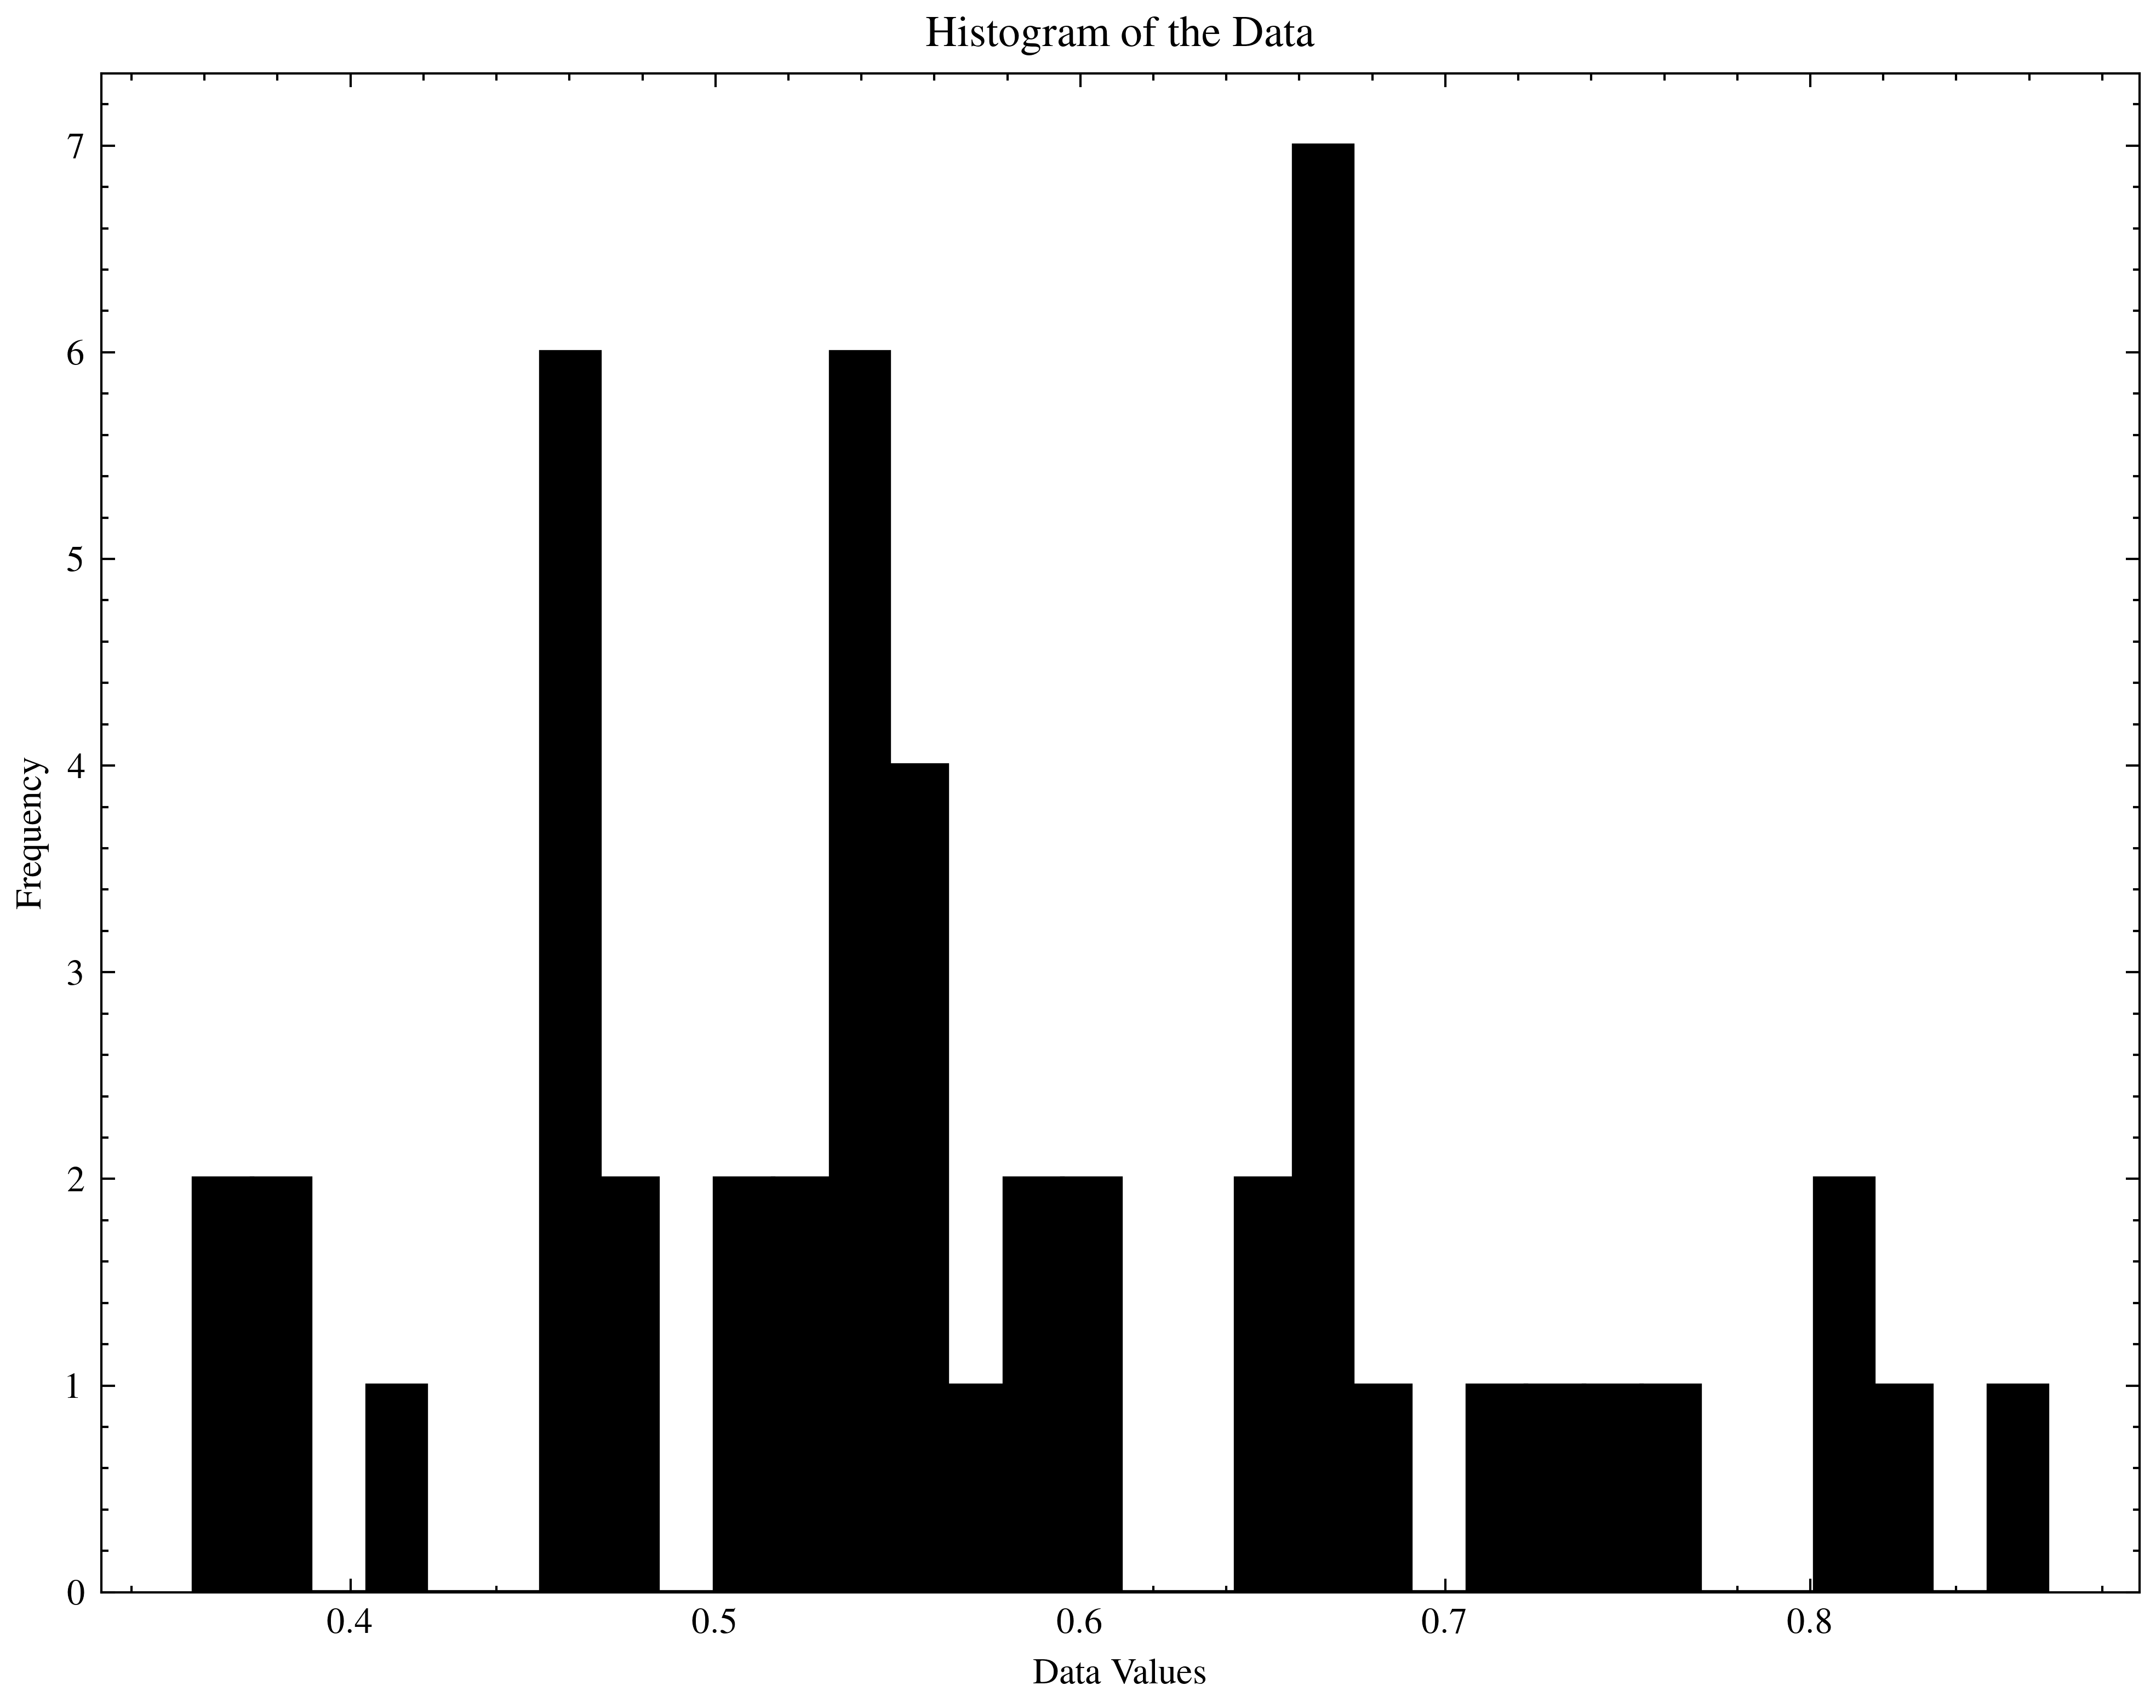

In [65]:
data = hist_data_white
plt.figure(figsize=(8, 6))
plt.hist(data, bins=len(set(data)), edgecolor='black')
plt.title("Histogram of the Data")
plt.xlabel("Data Values")
plt.ylabel("Frequency")
plt.show()


In [6]:
import pandas as pd
import numpy as np
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import BeliefPropagation
# create data sample with 9 random variables:
data = pd.DataFrame(np.random.randint(0, 5, size=(5000, 9)), columns=list('ABCDEFGHI'))
# add 10th dependent variable
data['J'] = data['A'] * data['B']
# data -> edges 
hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method=BicScore(data))
# sorted(best_model.nodes())
# ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
edges = best_model.edges()
print(type(edges))
# edges -> model
bn = BayesianNetwork(edges)
bn.fit(data, estimator=MaximumLikelihoodEstimator)
# inference:model+evidence -> query
inference_bp = BeliefPropagation(bn)
query_bp = inference_bp.map_query(variables=["A","B","J"]) #, evidence={'A': 3, 'B': 2, 'J':1}
print(query_bp)
query_bp.values()
# OutEdgeView([('B', 'J'), ('A', 'J')])
# search a model with restriction on the number of parents:
# est.estimate(max_indegree=1).edges()

  0%|          | 0/1000000 [00:00<?, ?it/s]

<class 'networkx.classes.reportviews.OutEdgeView'>
{'A': 3, 'B': 0, 'J': 0}


dict_values([3, 0, 0])

In [27]:
from pgmpy.inference import VariableElimination
# create inference object
infer = VariableElimination(bn)
# compute P(B|J=1)
q = infer.query(variables=["J"], evidence={'A': 1, 'B': 1})
print(q)
print("  ")
print(q.values)

+-------+----------+
| J     |   phi(J) |
+=======+==========+
| J(0)  |   0.0000 |
+-------+----------+
| J(1)  |   1.0000 |
+-------+----------+
| J(2)  |   0.0000 |
+-------+----------+
| J(3)  |   0.0000 |
+-------+----------+
| J(4)  |   0.0000 |
+-------+----------+
| J(6)  |   0.0000 |
+-------+----------+
| J(8)  |   0.0000 |
+-------+----------+
| J(9)  |   0.0000 |
+-------+----------+
| J(12) |   0.0000 |
+-------+----------+
| J(16) |   0.0000 |
+-------+----------+
  
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
# Access the CPDs for A, B, and J
print(bn.get_cpds("A"))
cpd_A = bn.get_cpds('A')
cpd_B = bn.get_cpds('B')
print(cpd_B)
cpd_J = bn.get_cpds('J')

# Compute the joint probability
# This is a general example. You need to adjust it according to your network's structure and CPDs.
prob_A1 = cpd_A.values[1]  # Probability of A=1
print(prob_A1)
print(cpd_B.values)
# prob_B2_given_A1 = cpd_B.values[1, 1]  # Probability of B=2 given A=1 (adjust indices as per your CPD)
# prob_J3_given_A1_B2 = cpd_J.values[3, 1, 1]  # Probability of J=3 given A=1, B=2 (adjust indices as per your CPD)

# joint_probability = prob_A1 * prob_B2_given_A1 * prob_J3_given_A1_B2
# print("Joint probability of A=1, B=2, J=3:", joint_probability)

+------+--------+
| A(0) | 0.203  |
+------+--------+
| A(1) | 0.1998 |
+------+--------+
| A(2) | 0.1962 |
+------+--------+
| A(3) | 0.2072 |
+------+--------+
| A(4) | 0.1938 |
+------+--------+
+------+--------+
| B(0) | 0.2062 |
+------+--------+
| B(1) | 0.2012 |
+------+--------+
| B(2) | 0.196  |
+------+--------+
| B(3) | 0.1992 |
+------+--------+
| B(4) | 0.1974 |
+------+--------+
0.1998
[0.2062 0.2012 0.196  0.1992 0.1974]


In [93]:
base_edges =[('Packet_1_1', 'Packet_1_2'), ('Packet_1_2', 'Packet_1_3'), ('Packet_1_3', 'Packet_1_4'), ('Packet_1_4', 'Packet_1_5'), ('Packet_1_5', 'Packet_1_6'), ('Packet_1_6', 'Packet_1_7'), ('Packet_1_7', 'Packet_1_8'), ('Packet_1_8', 'Packet_1_9'), ('Packet_1_9', 'Packet_1_10'), ('Packet_1_1', 'Packet_2_1'), ('Packet_1_2', 'Packet_2_2'), ('Packet_2_1', 'Packet_2_2'), ('Packet_1_3', 'Packet_2_3'), ('Packet_2_2', 'Packet_2_3'), ('Packet_1_4', 'Packet_2_4'), ('Packet_2_3', 'Packet_2_4'), ('Packet_1_5', 'Packet_2_5'), ('Packet_2_4', 'Packet_2_5'), ('Packet_1_6', 'Packet_2_6'), ('Packet_2_5', 'Packet_2_6'), ('Packet_1_7', 'Packet_2_7'), ('Packet_2_6', 'Packet_2_7'), ('Packet_1_8', 'Packet_2_8'), ('Packet_2_7', 'Packet_2_8'), ('Packet_1_9', 'Packet_2_9'), ('Packet_2_8', 'Packet_2_9'), ('Packet_1_10', 'Packet_2_10'), ('Packet_2_9', 'Packet_2_10'), ('Packet_2_1', 'Packet_3_1'), ('Packet_2_2', 'Packet_3_2'), ('Packet_3_1', 'Packet_3_2'), ('Packet_2_3', 'Packet_3_3'), ('Packet_3_2', 'Packet_3_3'), ('Packet_2_4', 'Packet_3_4'), ('Packet_3_3', 'Packet_3_4'), ('Packet_2_5', 'Packet_3_5'), ('Packet_3_4', 'Packet_3_5'), ('Packet_2_6', 'Packet_3_6'), ('Packet_3_5', 'Packet_3_6'), ('Packet_2_7', 'Packet_3_7'), ('Packet_3_6', 'Packet_3_7'), ('Packet_2_8', 'Packet_3_8'), ('Packet_3_7', 'Packet_3_8'), ('Packet_2_9', 'Packet_3_9'), ('Packet_3_8', 'Packet_3_9'), ('Packet_2_10', 'Packet_3_10'), ('Packet_3_9', 'Packet_3_10')]

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import scienceplots # 如果不存在，需要pip install scienceplots
plt.style.available # 查看可用的样式    
plt.style.use(['science','ieee']) # 选择一个样式
plt.figure(figsize=(2, 2),dpi=300)
# 输入的边列表，例如：[('A', 'B'), ('B', 'C'), ('A', 'C')]
optimal_edges =[('Packet_1_2', 'Packet_1_3'), ('Packet_1_3', 'Packet_1_4'), ('Packet_1_4', 'Packet_1_5'), ('Packet_1_4', 'Packet_2_4'), ('Packet_1_5', 'Packet_1_6'), ('Packet_1_6', 'Packet_1_7'), ('Packet_1_7', 'Packet_1_8'), ('Packet_1_8', 'Packet_1_9'), ('Packet_1_9', 'Packet_1_10'), ('Packet_2_1', 'Packet_2_2'), ('Packet_2_1', 'Packet_3_1'), ('Packet_2_2', 'Packet_2_3'), ('Packet_2_3', 'Packet_2_4'), ('Packet_2_4', 'Packet_2_5'), ('Packet_2_5', 'Packet_2_6'), ('Packet_2_6', 'Packet_2_7'), ('Packet_2_7', 'Packet_2_8'), ('Packet_2_8', 'Packet_2_9'), ('Packet_2_9', 'Packet_2_10'), ('Packet_3_1', 'Packet_3_2'), ('Packet_3_2', 'Packet_3_3'), ('Packet_3_3', 'Packet_3_4'), ('Packet_3_4', 'Packet_3_5'), ('Packet_3_5', 'Packet_3_6'), ('Packet_3_6', 'Packet_3_7'), ('Packet_3_7', 'Packet_3_8'), ('Packet_3_8', 'Packet_3_9'), ('Packet_3_9', 'Packet_3_10')]
edges = base_edges
new_edges = []
for edge in edges:
    # for node in edge:
        # 将packet替换为P
    node1 = edge[0].replace("Packet", "P")
    node2 = edge[1].replace("Packet", "P")
    node1 = node1.replace("_", ".")
    node2 = node2.replace("_", ".")
    edge = (node1, node2)
    new_edges.append(edge)
edges = new_edges
# 创建有向图对象
G = nx.DiGraph()
G_base = nx.DiGraph()
# 添加边到图中
G.add_edges_from(edges)
# G_base.add_edges_from(base_edges)
# 可视化图
pos =nx.shell_layout(G)# nx.planar_layout(G)# 使用spring_layout算法布局节点
nx.draw(G,pos, with_labels=True, font_weight='light', node_size=60, node_color='skyblue', font_size=5, arrowsize=3, edge_color='gray')
nx.draw(G_base,pos, with_labels=True, font_weight='light', node_size=60, node_color='skyblue', font_size=5, arrowsize=3, edge_color='gray')
plt.title("Optimal Causal Network")
plt.show()


NameError: name 'base_edges' is not defined

<Figure size 600x600 with 0 Axes>

In [130]:
import graphviz

edges_list = edges

# Create directed graph
dot = graphviz.Digraph()

# Add nodes and edges
for edge in edges_list:
    dot.edge(edge[0], edge[1])
dot.attr(layout='dot') # 如dot、neato、fdp、sfdp、twopi、circo
# Render the graph in PNG format
dot.render('dag_graph', format='png', cleanup=True) 
# 设置节点标签字体大小
dot.node_attr.update(fontsize='20')

# 设置边标签字体大小
# dot.edge_attr.update(fontsize='12')

# Specify the format as 'png' when viewing
dot.view()


'dag_graph.pdf'

Error: no "view" rule for type "application/pdf" passed its test case
       (for more information, add "--debug=1" on the command line)


In [ ]:
from pypgm.graphs import BeliefNetwork
from pypgm.inference import VariableElimination

# 创建概率图模型
bn = BeliefNetwork()
bn.add_edges_from([
    ('A', 'C'),
    ('B', 'C'),
    ('C', 'D')
])

# 设置节点A的概率分布
bn.set_node_probability('A', {'A_0': 0.3, 'A_1': 0.7})

# 设置节点B的概率分布
bn.set_node_probability('B', {'B_0': 0.6, 'B_1': 0.4})

# 设置节点C的概率分布
bn.set_node_probability('C', {'C_00': 0.2, 'C_01': 0.8, 'C_10': 0.9, 'C_11': 0.1})

# 设置节点D的概率分布
bn.set_node_probability('D', {'D_0': 0.5, 'D_1': 0.5})

# 推断联合概率分布
inference = VariableElimination(bn)
joint_distribution = inference.query(['A', 'B', 'C', 'D'])

# 计算概率 P(A=0, B=0, C=00, D=0)
probability_A0_B0_C00_D0 = joint_distribution.values[0]
print("P(A=0, B=0, C=00, D=0):", probability_A0_B0_C00_D0)


0.22496942292724512